Bayesian Risk
=================

$$\\[2pt]$$


Igor Marfin **[Unister Gmb@2014]** < <igor.marfin@unister.de>>


$$\\[40pt]$$

#Table of Contents
* &nbsp;
	* [0.1 Abstract](#0.1-Abstract)
	* [0.2 Initialization](#0.2-Initialization)
	* [0.3 Utility Theory](#0.3-Utility-Theory)
		* [0.3.1 Utility functions](#0.3.1-Utility-functions)
		* [0.3.2 Example on the application of the Utility and Decision theories:  "Play Game or Die ..."](#0.3.2-Example-on-the-application-of-the-Utility-and-Decision-theories:--"Play-Game-or-Die-...")
		* [0.3.3 Loss functions](#0.3.3-Loss-functions)
	* [0.4 Decision Theory in formulas](#0.4-Decision-Theory-in-formulas)
		* [0.4.1 Frequentists risk function](#0.4.1-Frequentists-risk-function)
			* [0.4.1.1 Example of the frequentists risk function for the squared-error loss](#0.4.1.1-Example-of-the-frequentists-risk-function-for-the-squared-error-loss)
		* [0.4.2 Bayesian risk](#0.4.2-Bayesian-risk)
	* [0.5 Example: Dealing with the Bayesian (Bayes) Risk on the show The Price is Right](#0.5-Example:-Dealing-with-the-Bayesian-%28Bayes%29-Risk-on-the-show-The-Price-is-Right)
		* [0.5.1 Get and Clean data](#0.5.1-Get-and-Clean-data)
		* [0.5.2 The  Showcase Model](#0.5.2-The--Showcase-Model)
		* [0.5.3 The machinery to make decisions](#0.5.3-The-machinery-to-make-decisions)
		* [0.5.4 The Decisions Making machinery with the Bayes rule](#0.5.4-The-Decisions-Making-machinery-with-the-Bayes-rule)
	* [0.6 Machine Learning with the Bayes Risk](#0.6-Machine-Learning-with-the-Bayes-Risk)
		* [0.6.1 An Example: Financial prediction](#0.6.1-An-Example:-Financial-prediction)
		* [0.6.2 Get the Financial data from Google: stock prices of Apple Inc.](#0.6.2-Get-the-Financial-data-from-Google:-stock-prices-of-Apple-Inc.)
		* [0.6.3 Ordinary Least Square Fit on the Apple stock prices](#0.6.3-Ordinary-Least-Square-Fit-on-the-Apple-stock-prices)
		* [0.6.4 Decision Maker with the Bayes rule  to predict prices of  the Apple stock](#0.6.4-Decision-Maker-with-the-Bayes-rule--to-predict-prices-of--the-Apple-stock)
		* [0.6.5 An example: Observing Dark World](#0.6.5-An-example:-Observing-Dark-World)


$$\\[10pt]$$

## 0.1 Abstract

--------------------------

Cameron Davidson-Pilon, "Probabilistic Programming and Bayesian Methods for Hackers":

>Would you rather lose an arm or a leg?

The chapter 5 of the Cameron's book has given me the motivation of this work.  I am going
to implement the Machinery of the decision making which uses the Bayes risk. Basic examples
were taken from the chapter 5 of the  book.


Statisticians can be a sour bunch. Instead of considering their winnings, they only measure how much they have lost. In fact, they consider their wins as negative losses. But what's interesting is how they measure their losses. Our possible (or real) losses (positive or negative) force us to take the certain decisions which 
avoid to experience the same losses in future. We choose only one decision depending on our experience and beliefs, and these decision is advised  us by the Decision theory (**DT**) <a name="ref-1"/>[(D.WARNERNORTH, 1968)](#cite-WARNER). This theory provides a rational framework for
choosing between alternative courses of action when the consequences resulting from this choice are imperfectly known. 

A decision causes something to happen, something that has different consequences depending on what the true state of nature turns out to be.
For example, one has to make decisions about the design of the detector, about how much time to spend on different activities, or when to publish a result. On the other hand, estimating a parameter value is not a decision, since we cannot decide what value a parameter will have.


There are two streams of thought which serve in the **DT**  as the foundations:
 
 * the utility theory,

 * inductive use of the probability theory.

We are going to consider both and make a framework based on the **DT** to make decisions.


More details can be found at https://bitbucket.org/iggy_floyd/bayesian-pymc-risk-management.

$$\\[5pt]$$

## 0.2 Initialization

--------------------------



To set up the python environment for the data analysis and make a nicer style of the notebook, one can run the following commands in the beginning of our modeling:

In [1]:
import sys
sys.path = ['/usr/local/lib/python2.7/dist-packages'] + sys.path # to fix the problem with numpy: this replaces  1.6 version by 1.9

%matplotlib inline
%pylab inline
ion()

import os
import matplotlib 
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import logging
import pymc as pm

# a plotter and dataframe modules
import seaborn as  sns # seaborn to make a nice plots of the data
import pandas as pd
import scipy.stats as stats





# Set up logging.
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from book_format import load_style, figsize, set_figsize
load_style()



Populating the interactive namespace from numpy and matplotlib


Then we load notebook extensions which provide us useful functionality.

In [2]:
%%javascript
IPython.load_extensions("calico-spell-check", "calico-document-tools",
"calico-cell-tools");


<IPython.core.display.Javascript object>

$$\\[5pt]$$

## 0.3 Utility Theory

----------------

The first stage in setting up a structure for decision making is to assign numerical values to the possible outcomes. This task falls within the area covered by the
modern theory of utility <a name="ref-2"/>[(D.WARNERNORTH, 1968)](#cite-WARNER). Utility theory can operate with two types of the functions assigning a numerical weight to a decision:

* utility functions
* loss functions

First, we consider the utility functions.


$$\\[5pt]$$

### 0.3.1 Utility functions

----------------

I want to quote a few  statements of  D. WARNER NORTH from his article
<a name="ref-3"/>[(D.WARNERNORTH, 1968)](#cite-WARNER), perfectly explaining the utility functions `u(A)`, where `A` is a particular decision.

Before we can introduce utility functions, we need to formulate four assumptions.
Following the ideas of the D. WARNER NORTH, here are  they:

**The first assumption**
>D. WARNER NORTH: "The first and perhaps the biggest assumption to be
made is that any two possible outcomes resulting from a
decision can be compared. Given any two possible out-
comes or prizes, you can say which you prefer. In some cases you might say that they were equally desirable or undesirable, and therefore you are indifferent."

>D. WARNER NORTH: "A reasonable extension of the existence of your preference among outcomes is that the preference be transitive; if you prefer A to B and B to C, then it follows that you prefer A to C."

**The second assumption**
>D. WARNER NORTH: "The second assumption, originated by von Neumann and Morgenstern, forms the core of modern utility  theory: you can assign preferences in the same mariner to lotteries involving prizes as you can to the prizes them selves."

What does it mean? 

>D. WARNER NORTH: "Imagine a pointer that spins in the center of a circle divided into 
two regions, as shown in Fig. 3. If you spin the pointer and it lands in region I, you get prize A; if it lands in region II, you get prize B. We shall assume that the pointer is spin in such a way that, when it stops, it is equally likely to be pointing in any given direction. The fraction of the circumference of the circle in region I will be denoted P, and that in region II as 1 - P. Then from the assumption that all directions are equally likely, the probability that the lottery gives you prize A is P, and the probability that you get prize B is 1 - P. We shall denote such a lottery as 
(P,A;1 - P,B) and represent it, by Fig. 4."


**The third assumption**
>D. WARNER NORTH: "Then it would seem natural for you to prefer prize A to the lottery,
(P,A;1 - P,B), between prize A and prize B, and to prefer this lottery between prize A and prize B to prize B for all probabilities P between 0 and 1."

**The third assumption**
>D. WARNER NORTH: "Fourth, we make a continuity assumption. Consider three prizes, A, B, arid C. You prefer A to C, and C to B (and, as we have pointed out, you will therefore prefer A to B). We shall assert that there must, exist some probability P so that yrou are indifferent, to receiving prize C or the lottery (P,A;1 - P,B) between A and B. C is called the certain equivalent of the lottery (P,A;1 - P,B),and on the strength of our "no fun in gambling" assumption, we assume that inter-changing C and the lottery
(P,A;1 - P,B) as prizes in some compound lottery does not change your evaluation of the latter lottery. We have not assumed that, given a lottery (P,A;1 - P,B), there
exists a Prize C intermediate in value between A and B so that you are indifferent between C and (P,A;1 - P,B). Instead we have assumed the existence of the probability P."


Under these assumptions, there is a concise mathematical representation possible for preferences: a utility function `u( )` that assigns a number to each lottery or
prize. This utility function has the following properties:

>u(A) > u(B), if and only if A > B (1)

>if C ~ (P,A;1 -P,B), then u(C) = P * u(A) + (1 - P) * u(B) (2)

It is important to remember that 

1. Utility function is a merit of the profit from A,B,C decisions or  the lottery between A and B, (P,A;1 - P,B), and the decision C.

2. A,B and C decisions are associated with money, for example, "you have the following preference among decisions, A>C>B.  This might be that the decisions A brings you 100 Euro, but decision C gives you nothing, i.e. 0 Euro, or even worser with the decision B you loose 100 Euro, i.e -100Euro"

3. Imagine, that for each decision $D$, we have a list of possible outcomes $A_i$ with probabilities $P_i$, i.e. $(A_1,P_1)$,$(A_2,P_2)$,...., $(A_n,P_n)$, where $\sum_i P_i = 1$. Then the decision the price of the decision $D$ will be $u(price_D)$ = $\sum_i P_i \times u(A_i)$, i.e. we are indifferent to get $price_D$ Euro and from somebody or to make our decision. If somebody propose less money, we make our decision $D$, otherwise we
take money, if their amount more than $price_D$. OK, then, imagine that we have a list
of decisions $\{D^j\}$ with the corresponding set  $(A_i^j,P_i^j)$. We construct the
prices of decisions,  $u(price^{D^j})$ = $\sum_i P_i^j \times u(A_i^j)$, and find out
the decision with maximal price:

$$price^{D^{max}} \sim argmax(\{u(price^{D^j})\}).$$

These $D^{max}$ is out preferable decision.

The utility function is widely discussed in the Internet. The particular interesting functions are **Risk aversion functions**.

>A person is given the choice between two scenarios, one with a guaranteed payoff and one without. In the guaranteed scenario, the person receives 50 Euro. In the uncertain scenario, a coin is flipped to decide whether the person receives 100 Euro or nothing. The expected payoff for both scenarios is 50 Euro, meaning that an individual who was insensitive to risk would not care whether they took the guaranteed payment or the gamble. However, individuals may have different risk attitudes

>A person is said to be:
>
* risk-averse (or risk-avoiding) - if he or she would accept a certain payment (certainty equivalent) of less than 50 Euro (for example, 40 Euro), rather than taking the gamble and possibly receiving nothing.
* risk-neutral - if he or she is indifferent between the bet and a certain 50 Euro payment.
* risk-loving (or risk-seeking) - if he or she would accept the bet even when the guaranteed payment is more than 50 Euro (for example, 60 Euro).


Following prescriptions, given 
in the wiki page
<a name="ref-4"/>[(WikimediaFoundation, 2015)](#cite-Risk_aversion), I have created the package `Utility_functions`, which has codes of:

* constant absolute risk aversion (CARA) utility functions 
* constant relative risk aversion (CRRA) utility functions 

/home/debian/debian-package/netbeans/bayesian-pymc-risk-management/Utility_functions


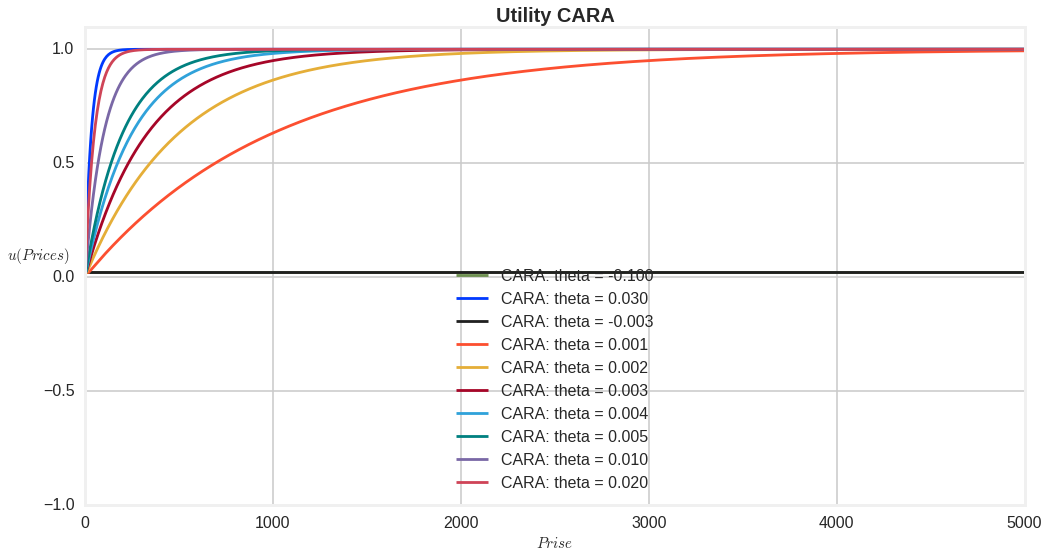

theta 0.5
theta 0.75
theta 1.1
theta 1.5
theta 1.75
theta 2.0
theta 3.0


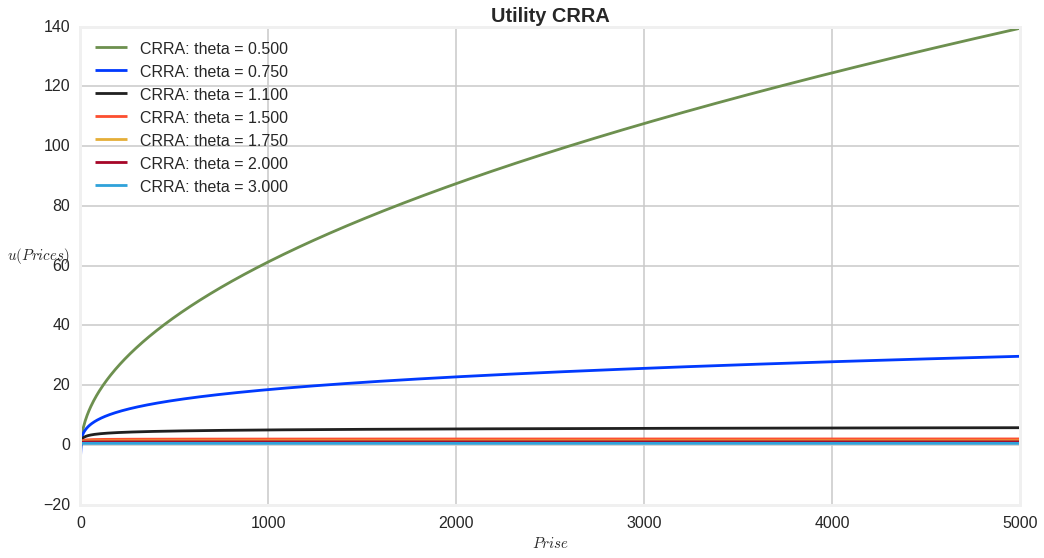

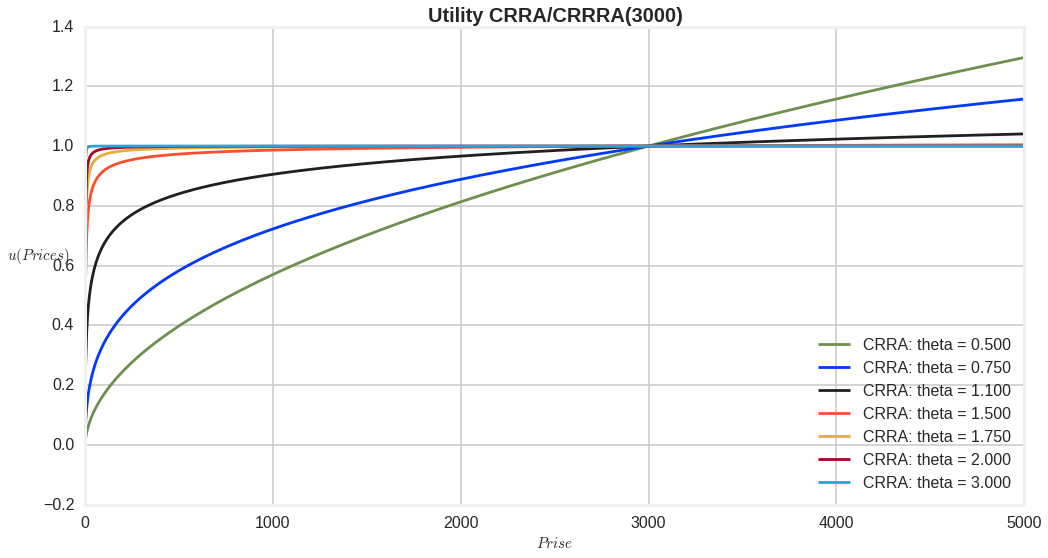

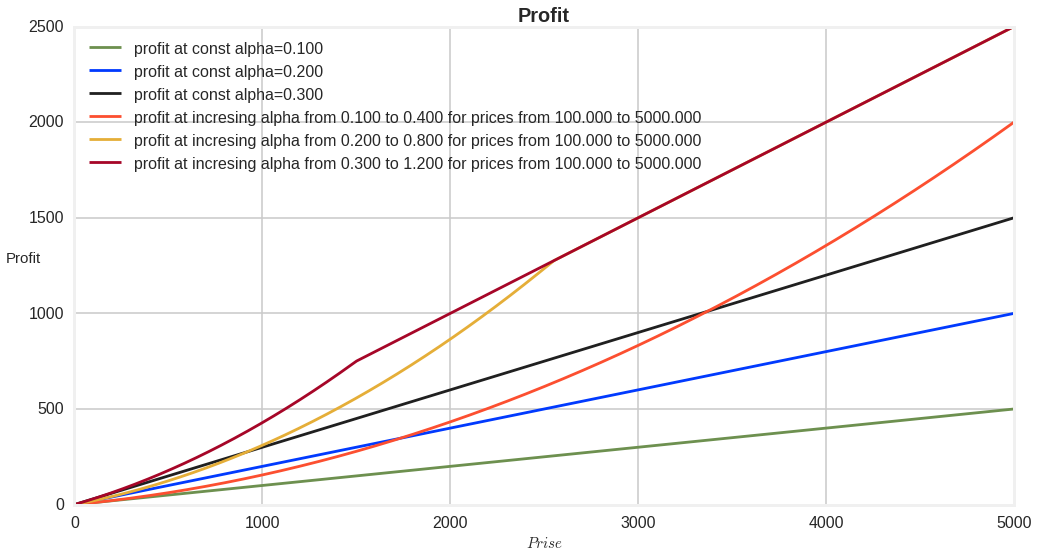

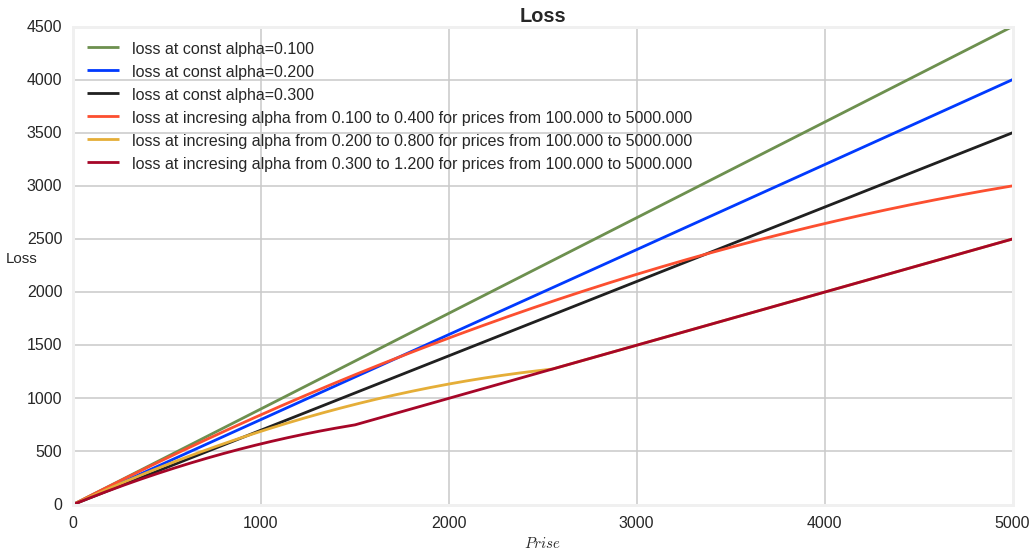

/home/debian/debian-package/netbeans/bayesian-pymc-risk-management


In [3]:
# let's make a few plots of the provided functions
import Utility_functions as uf
%cd Utility_functions
%run plot.py
%cd -

$$\\[5pt]$$

### 0.3.2 Example on the application of the Utility and Decision theories:  "Play a Game or Die ..."

---------------------


How do we use the utility functions and decision theory  on practice?

>Let's imagine the situation. You have been caught by rebels. They have given you
>two choices:
>
>1. you play the game
>2. you die

You have decided not to die (I hope so), agreed to play the game.

The game had the following rules:

* **Rule-1**: Somebody from rebels falls the coin down. If the coin lands on the head side, you get 100 Euro, if the coin flips down and lands on the tail side, you pay 30 Euro

* **Rule-2**: you can avoid playing the game, if you pay 10 Euro.


You decide to build the utility function which you will use to make a decision.

The utility function is quite simple:

    1) make a normalization of the price of any outcome A
    price_of_outcome(A) = max(-100.,min(100,price_of_outcome))
  
    2) utility function is defined as
    U(A) = price_of_outcome(A)/(100.)
    such that the function takes values in the range [-1,1]

Then after looking at the plots of the `CARA` utility functions, you decide to use
`cara_utility` for the positive price of the outcome or `-cara_utility` for the negative price of the outcome to program the steps 1) and 2). 
Also you decide naively that the probabilities of the flipping on each side are the same and
equal to P=0.5.

Then you write your simple code which will make a decision:

In [4]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Basics of the Decision Maker 
'''

import scipy.optimize as optimize

# define the utility function and its parameters
nothing = 0.0 # nothing is '0' Euro

'''
    we want the following:
    1)at 90 Euro, the utility value should be close to 0.90
    2)at 80 Euro, it should be close to 0.80
    ...
    100) at 1 Euro, it should be close to 0.01 
    
    We choose two edge points, 1) and 100), to estimate the lowest and highest values of the 
    theta parameter.
    We find them solving two equations:
         uf.cara_utility(90.,x,nothing) -.90 == 0
         uf.cara_utility(1.,x,nothing) -0.01 == 0
    To do that, we use the scipy.optimize.brentq described here
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html
'''
theta_value_high = lambda x: uf.cara_utility(90.,x,nothing) -.90
theta_value_low = lambda x: uf.cara_utility(1.,x,nothing) -0.01

# find the theta parameter values  w
theta_low=optimize.brentq(theta_value_high, 0, 1)
theta_high = optimize.brentq(theta_value_low, 0, 1)
if (theta_low>theta_high): theta_low,theta_high = theta_high,theta_low
theta_our_choice = np.random.uniform(theta_low,theta_high)
print "the optimal value of theta parameter:{}".format(theta_our_choice)

# probability of the flipping coins to land at some side
P=1./2.
proba = lambda x: x

# define the utility function of our choices
utility_choice = lambda x: cara_utility(x,theta_our_choice,nothing) if x>0. else -cara_utility(abs(x),theta_our_choice,nothing)

#  define outcomes
outcomes={
    "win":100.,
    "loss":-30.,
    "refuse_to_play":-10.
}

# probabilities of each outcome
probas = {
    "win":proba(P),
    "loss":1. - proba(P),
    "refuse_to_play":1.0        
    }


def utility_decisions(outcomes,probas):
    ''' returns the utility function of each decisions '''
    
    decisions = []

    # a decision 1)
    decisions += [utility_choice(outcomes["win"])*probas["win"]  +  
    utility_choice(outcomes["loss"])*probas["loss"] ]

    # a decision 2)
    decisions += [utility_choice(outcomes["refuse_to_play"])*probas["refuse_to_play"]]
    return decisions


decisions_utility_costs=utility_decisions(outcomes,probas)

print "What are the utility cost of our decisions:",decisions_utility_costs

# transform costs to Euro and choose the decision with the highest price
what_price_inEuro = lambda x,y: utility_choice(x) -y
decisions_euro_costs = map(lambda x:optimize.brentq(what_price_inEuro, -100., 100.,args=(x)) ,decisions_utility_costs)

# a result
print "What money will cost (in Euro) the decisions to us? : ",decisions_euro_costs
print "We decide to %s "%'play the game' if argmax(decisions_euro_costs) == 0 else 'not play the game'

the optimal value of theta parameter:0.0170162318878
What are the utility cost of our decisions: [0.20890799997685033, -0.15647211501626335]
What money will cost (in Euro) the decisions to us? :  [13.771615891446064, -10.000000000000004]
We decide to play the game 


$$\\[5pt]$$

Definitely, we have to make the first decision. 

$$\\[45pt]$$

Now, imagine, that we don't know  exactly the probability for the coin flipping side.  How do we react in this case?

We need to update our machinery in such way that our decision making will be a function of the unknown probability:

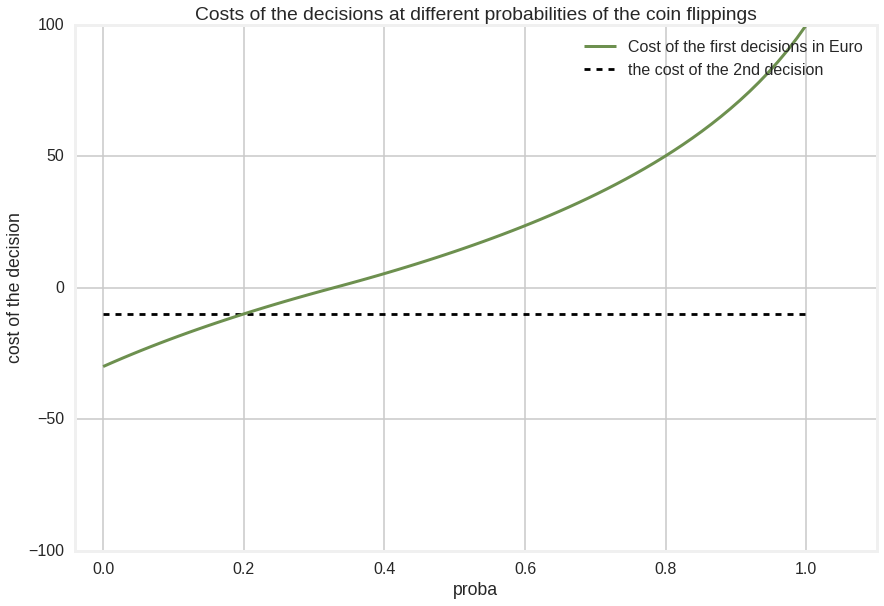

In [5]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Update (1) on the Decision Maker 
'''

# probabilities of each outcome
probas = lambda x: {
    "win":proba(x),
    "loss":1. - proba(x),
    "refuse_to_play":1.0        
    }


proba_val = np.linspace(0., 1., 75) # probability of coin flipping can equaly take 75 values in the range [0,1]  
# cost of the first decision
decision1_utility_costs = [utility_decisions(outcomes,probas(x))[0] for x in proba_val]
decision2_utility_costs = [utility_decisions(outcomes,probas(x))[1] for x in proba_val]
decision1_euro_costs = map(lambda x:optimize.brentq(what_price_inEuro, -100., 100.,args=(x)) ,decision1_utility_costs)
decision2_euro_costs = map(lambda x:optimize.brentq(what_price_inEuro, -100., 100.,args=(x)) ,decision2_utility_costs)
 


plt.plot(proba_val,decision1_euro_costs ,
         label="Cost of the first decisions in Euro", lw=3)

plt.hlines(decision2_euro_costs[0], 0, 1., linestyles="--",label='the cost of the 2nd decision')

plt.xlabel("proba")
plt.ylabel("cost of the decision")
plt.xlim(-0.04, 1.1)
plt.ylim(-100., 100.)
plt.legend()
plt.title("Costs of the decisions at different probabilities of the coin flippings");



In [6]:
# let's find the probability when we want to make the second decision

utility_value_decision1= lambda x: utility_decisions(outcomes,probas(x))[0]
utility_value_decision2= lambda x: utility_decisions(outcomes,probas(x))[1]
# find  the probability  when utility_value_decision1 == utility_value_decision2
probability_value= lambda x: utility_value_decision1(x) -  utility_value_decision2(x)

# our decision maker
print "We play the game only if  flipping probability to fall to a head  > %3.4f"% optimize.brentq(probability_value, 0., 1.,)
print "otherwise, we don't play the game"



We play the game only if  flipping probability to fall to a head  > 0.1999
otherwise, we don't play the game


$$\\[5pt]$$

Let's imagine that you have asked the rebels to flip $N$ times the coin, they have agreed and you have calculated the number of the head landings $m$. Then you update you machinery in the way:

In [7]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Update (2) on Decision Maker Machinery 
'''

def decide(limit_proba=optimize.brentq(probability_value, 0., 1.,),N=1.,m=0.):
    ''' make a decision '''    
    
    priory_proba = float(m)/float(N) if N>0. else 0.        
    return 'play the game' if priory_proba>limit_proba else 'not play the game'

If you have got from rebels $N=21$ and $m=5$, you  must have decided...

In [8]:
decide(N=21,m=5)

'play the game'

If they have told you $N=21$ and $m=2$, you must have decided:

In [9]:
decide(N=21,m=2)

'not play the game'

### 0.3.3 Loss functions

------------

Now we introduce what statisticians and decision theorists call loss functions.
Basically, there are only two features by which loss functions and utility functions differ:

* the meaning
* a number of arguments.


**The Meaning**

* Utility functions `u()` present the profit from making the particular decision 
* Loss functions `L()` present the loss from the making the particular decision.

One can exchange the meaning of an utility function with the meaning of a loss function by changing the sign of  returned values:

$$ u(\cdot) \equiv -L(\cdot) $$

** A number of arguments**

* The function `u(A)` takes one argument `A`, where `A` is one of the possible outcomes accepted during the decision.
* The function $L(\theta,\hat{\theta})$ takes two arguments $\theta,\hat{\theta}$:
   * $\theta$ is a true value of some outcome,parameter or nature phenomenon  (usually unknown)
   * $\hat{\theta}$ is an estimated value for this quantity. 
   * $L(\theta,\hat{\theta})$  plays a role of the distance (metric) between unknown $\theta$ and estimated $\hat{\theta}$. Usually, $L(\theta,\hat{\theta})$ is a function of
   the type  $L(\theta-\hat{\theta})$. That means that loss function can be presented by 
   a one-parametric function, i.e. by the utility function.
   

Remembering the previous example of use of the utility functions

$$ u(x) \sim \frac{x}{100.}, x=min(100.,max(-100.,x)) $$
where x was the price of outcome X,

we can formulate the loss function $L(\theta,\hat{\theta})$ for this case as
$$L(\theta,\hat{\theta})=\frac{\theta-\hat{\theta}}{100},$$

and it is obvious that $$ L(0,x) \equiv -u(x).   $$



As we said, a loss function is a function of the true parameter, and an estimate of that parameter.



The important point of loss functions is that it measures how bad our current estimate is: the larger the loss, the worse the estimate is according to the loss function. A simple, and very common, example of a loss function is the squared-error loss:

$$L( \theta, \hat{\theta} ) = ( \theta -  \hat{\theta} )^2$$




In [10]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Defintions of the Loss functions 
'''
def squared_error_loss(theta_true,theta):
    '''  the squared-error loss function '''
    
    return (theta_true-theta)**2


The squared-error loss function is used in estimators like linear regression, UMVUEs and many areas of machine learning. We can also consider an asymmetric squared-error loss function, something like:

$$L( \theta, \hat{\theta} ) = \begin{cases} ( \theta -  \hat{\theta} )^2 & \hat{\theta} \lt \theta \\\\ c( \theta -  \hat{\theta} )^2 & \hat{\theta} \ge \theta, \;\; 0\lt c \lt 1 \end{cases}$$

In [11]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Defintions of the Loss functions 
'''
def asymmetric_squared_error_loss(theta_true,theta,c):
    '''  the asymmetric squared-error loss function '''
    
    
    c=max(0,min(1,c))
    if (theta_true < theta): return (theta_true-theta)**2
    
    return c*(theta_true-theta)**2

A situation where this might be useful is in estimating web traffic for the next month, where an over-estimated outlook is preferred so as to avoid an underallocation of server resources.

A negative property about the squared-error loss is that it puts a disproportionate emphasis on large outliers. This is because the loss increases quadratically, and not linearly, as the estimate moves away. 

A more robust loss function that increases linearly with the difference is the absolute-loss


In [12]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Defintions of the Loss functions 
'''
def absolute_error_loss(theta_true,theta):
    '''  the absolute-error loss function '''
        
    return abs(theta_true-theta)

Other popular loss functions include:

* $L( \theta, \hat{\theta} ) = \mathbb{1}_{ \hat{\theta} \neq \theta }$ is the zero-one loss often used in machine learning classification algorithms.
* $L( \theta, \hat{\theta} ) = -\hat{\theta}\log( \theta ) - (1-\hat{ \theta})\log( 1 - \theta ), \; \; \hat{\theta} \in {0,1}, \; \theta \in [0,1]$ called the log-loss, also used in machine learning.

In [13]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Defintions of the Loss functions 
'''

def zero_one_loss(theta_true,theta):
    '''  the zero-one loss function '''
        
    return 0. if theta_true == theta else 1.



def log_loss(theta_true,theta):
    '''  the absolute-error loss function '''
    
    
    theta_true=max(1e-6,min(1.-1e-6,theta_true))
    theta=max(1e-6,min(1.-1e-6,theta))
    
    return -theta*np.log(theta_true) - (1.-theta)*np.log(1.-theta_true)


By shifting our focus from trying to be incredibly precise about parameter estimation to focusing on the outcomes of our parameter estimation, we can customize our estimates to be optimized for our application. This requires us to design new loss functions that reflect our goals and outcomes. Some examples of more interesting loss functions:

* $L( \theta, \hat{\theta} ) = \frac{ | \theta - \hat{\theta} | }{ \theta(1-\theta) }, \; \; \hat{\theta}, \theta \in [0,1]$ emphasizes an estimate closer to 0 or 1 since if the true value θ is near 0 or 1, the loss will be very large unless θ^ is similarly close to 0 or 1. This loss function might be used by a political pundit who's job requires him or her to give confident "Yes/No" answers. This loss reflects that if the true parameter is close to 1 (for example, if a political outcome is very likely to occur), he or she would want to strongly agree as to not look like a skeptic. 

* $L( \theta, \hat{\theta} ) =  1 - \exp \left( -(\theta -  \hat{\theta} )^2 \right)$ is bounded between 0 and 1 and reflects that the user is indifferent to sufficiently-far-away estimates. It is similar to the zero-one loss above, but not quite as penalizing to estimates that are close to the true parameter. 

In [14]:
'''
    Igor Marfin @2014 Unister GmbH <igor.marfin@unister.de>
    Defintions of the Loss functions 
'''

def political_loss(theta_true,theta):
    '''  the political loss function '''
        
    theta_true=max(1e-6,min(1.-1e-6,theta_true))
    return abs(theta_true-theta)/(theta_true*(1.-theta_true))



def zero_one_bound_loss(theta_true,theta):
    '''  the zero-one bound loss function '''
    
  
    return 1.-np.exp((theta_true-theta)**2)




    People notice one type of mistake — the failure to predict rain — more than other, false alarms. If it rains when it isn't supposed to, they curse the weatherman for ruining their picnic, whereas an unexpectedly sunny day is taken as a serendipitous bonus.

    [The Weather Channel's bias] is limited to slightly exaggerating the probability of rain when it is unlikely to occur — saying there is a 20 percent change when they know it is really a 5 or 10 percent chance — covering their butts in the case of an unexpected sprinkle.


$$\\[5pt]$$

## 0.4 Decision Theory in formulas

------------------------

Our decision-making will be based on the application of the Loss $L( \theta, \hat{\theta} )$.
The formulation of the **DT** which operates with the utilities $u(A)$ can be done in the
vice-versa manner. I am going to follow notations given in the lectures of F.James at 
*Statistics for Physis(DESY2012)*  
<a name="ref-5"/>[(JamesF., 2012)](#cite-James_DT) and lectures of M. Jordan <a name="ref-6"/>[(JordanI.M., 2014)](#cite-Jordan_DT). 

The decision theory provides a quantification of the `good` selection procedure for decisions. This quantification comes from the loss function $L( \theta, \hat{\theta} )$.

As we see later, this `good` selection procedure is called the **Bayes (Bayesian) rule**.



Decision theory deals with three different spaces:

* An observable space, $X$, in which all possible observations $X=(X_1,X_2,...,X_N)$ fall
* A parameter space contains all possible values of the parameter $\theta$
* A decision space $D$, which contains all possible decisions $d$.

A decision rule $\delta$, alternatively a decision procedure, decision function
specifies what decision $d$ is to be taken given the observation $X$, that is

$$ d = \delta(X). $$

In other words, the decision rule $\delta$ is a function taking $X$ as an argument and giving a float value $d$.

Frequentists and Bayesians use the loss function differently.


$$\\[5pt]$$

### 0.4.1 Frequentists risk function

--------------------------------------

In frequentist usage, the parameter $\theta$ is fixed and thus the data are averaged over. The **frequentists risk** is defined as 

$$R(\theta,\delta) = E_\theta(L(\theta,\delta(X))) ,$$

where $E_\theta$   is expectation  taken over the data $X$, with the parameter
$\theta$ held fixed.


The expression is above can be written in the integral form:

$$R(\theta,\delta) = E_\theta(L(\theta,\delta(X))) = \int L(\theta,\delta(X)) p(X|\theta) dX, $$ 

where $p(X|\theta)$ is the Likelihood (conditional probability to oberve $X$ given $\theta$). Please, pay an attention on the fact, that $\delta(X)$ plays a role of the 
estimation $\hat{\theta}$ for the parameter $\theta$.

The risk function is an expectation of the loss function or an average loss over all possible outcomes (observations). 


$$\\[5pt]$$

#### 0.4.1.1 Example of the frequentists risk function for the squared-error loss

------------------

The squared-error loss function is defined as 

$$L( \theta, \hat{\theta} ) = ( \theta -  \hat{\theta} )^2.$$

Then the risk function is expressed as 

$$R(\theta,\delta(X)) =  E_\theta(L(\theta,\delta(X))) =  E_\theta( (\theta - E_\theta(\delta(X)) + E_\theta(\delta(X)) - \delta(X))^2)=\\
E_\theta((\theta- E_\theta(\delta(X)))^2) + E_\theta((E_\theta(\delta(X)) - \delta(X))^2)
$$


The risk function takes a minimum at the rule 

$$E_\theta(\delta(X)) \equiv \int \delta(X)p(X|\theta)dX \equiv E(\delta(X)|\theta) = \theta.$$


$$\\[5pt]$$

### 0.4.2 Bayesian risk

------------------

In the Bayesian framework, we define the **posterior risk**,

$$\rho(X,\delta(X)) =  E_X(L(\theta,\delta(X))) = \int L(\theta,\delta(X)) p(\theta|X) d\theta.  $$

The rule $\delta^*(X)$ which minimizes the posterior risk $\rho(X,\delta)$ is called 
the **Bayes action**. 

The Bayes action for the squared-error loss function can be obtained in analogy to
the minimization of the frequentists risk. In this case, the Bayes rule takes  the 
following form:

$$  d^* \equiv \delta^*(X)=E_X(\theta) = E(\theta|X),  $$

the value of the Bayes action is an expectation of the parameter $\theta$ given data $X$.
The Bayes action is a function of $X$.

Despite the tensions between frequentists and Bayesians, they occasionally steal ideas from each other. If we use the prior density $\pi(\theta)$ of the parameter
to average the Frequentists risk,

$$ r(\delta,\pi) = \int R(\theta,\delta(X)) \pi(\theta)d\theta, $$

we get the **Bayes loss**. The Bayes loss is an expectation of the risk function over all
possible values of the  parameter $\theta$.


The rule $\delta^{**}$ which minimizes the Bayes loss $r(\delta,\pi)$ is a called the
**Bayes rule**. 


The **Bayes risk** is just the Bayes loss $r(\delta^{**},\pi)$ with the Bayes rule $\delta^{**}$ plugged in.


The Bayes loss can be rewritten in the way using the Bayes ratio

$$ p(X|\theta)\pi(\theta) = p(\theta|X)p(X), $$

$$ r(\delta,\pi) = \int R(\theta,\delta(X)) \pi(\theta)d\theta = 
\int L(\theta,\delta(X)) p(X|\theta)dX \pi(\theta)d\theta =  \\
\int L(\theta,\delta(X)) p(\theta|X)dX p(X)d\theta = \int \rho(X,\delta(X)) p(X) dX.
$$

That means that the Bayes rule is not only the rule which minimizes the 
frequentists risk function, but also it minimizes the posterior risk, i.e.
it is the Bayes action.


The Bayes rule for the squared-error loss function is such $\delta^{**}$  was already
obtained


$$ \hat{\theta} = \delta^{**}(X) = \delta^{*}(X) = E_X(\theta) = E(\theta|X) $$



$$\\[5pt]$$

In general, there is no analytical solution for the Bayes rule and Bayes risk.

We have to use numerical integration, namely, the MCMC approach. 
We are going to develop the framework based on PyMC which will 

* find the Bayes rule (aka the Bayes decision) (the decision when the  Bayes loss is minimal)
* calculate the Bayes risk (the value of the Bayes loss at the Bayes decision.)

for any model $M=\{p(X|\theta), \pi(\theta)\}$ with any loss function 
$L(\theta,\hat{\theta})$.

$$\\[5pt]$$

## 0.5 Example: Dealing with the Bayesian (Bayes) Risk on the show The Price is Right

--------------------------

Now it is time for practical applications of the obtained theoretical knowledge.

Bless you if you are ever chosen as a contestant on the Price is Right, for here we will show you how to optimize your final price on the *Showcase*. For those who forget the rules:



>1. Two contestants compete in *The Showcase*. 
2. Each contestant is shown a unique suite of prizes.
3. After the viewing, the contestants are asked to bid on the price for their unique suite of prizes.
4. If a bid price is over the actual price, the bid's owner is disqualified from winning.
5. If a bid price is under the true price by less than $250, the winner is awarded both prizes.




$$\\[5pt]$$

### 0.5.1 Get and Clean data

First, we want to obtain the priory knowledge about the  actual prices of prize suits in this showcase.

Let's try to get data from open sources. After googling for a while, I have found the
retail prices of prize suites for 794 showcases in the past
<a name="ref-7"/>[(www.datagrabber.org, 2015)](#cite-Price_List).
I have developed in my previous tutorial **"A Hierarchical Bayesian Model of the Bundes League"** a tool allowing you to scrape tables from twiki pages of the Wikipedia.

I am going to use this tool to extract data from the `www.datagraber.org`
<a name="ref-8"/>[(www.datagrabber.org, 2015)](#cite-Price_List).


In [15]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A tool to scrape data from wiki-pages
'''
from bs4 import BeautifulSoup
import urllib2
import warnings
from  StringIO import StringIO
import pandas as pd
warnings.filterwarnings('ignore')


class MyWikiParser(BeautifulSoup):
    ''' BeautifulSoup parser: parses <table> </table> tags'''
    
    def __init__(self,page,table_class_properties,table_header):
        BeautifulSoup.__init__(self,page,fromEncoding="UTF-8")
        self.recording = 0
        self.data = []
        self.table_class_properties = table_class_properties
        self.table_header = table_header

    def handle_data(self,column_tag="td"):
        tables = self.findAll("table", self.table_class_properties)         
        for table in tables:    
            first_row=table.find("tr")    
            first_cell_in_first_row = first_row.find(column_tag)
            rows = []
            if (first_cell_in_first_row is not None) and (self.table_header in str(first_cell_in_first_row)):        
                for row in table.findAll("tr"):            
                    vals=row.find_all('td')
                    vals=map(lambda x: x.text.encode('utf-8').split('!')[1] if len( x.text.encode('utf-8').split('!'))>1 else x.text.encode('utf-8').split('!')[0], vals) # fix some text data            
#                    rows.append([val.text.encode('utf-8').replace('\xe2\x95\xb2','/').replace('\xe2\x80\x93','-') for val in vals])
                    rows.append([val.replace('\xe2\x95\xb2','/').replace('\xe2\x80\x93','-') for val in vals])
                self.data=rows

        
class Wiki_Table(object):
    ''' exctracts values for the table from Wiki-Page files '''
 
    def __init__(self,url,table_class_properties,table_header,column_tag="td"):
        self.table = []
        header = {'User-Agent': 'Mozilla/5.0'} #Needed to prevent 403 error on Wikipedia        
        req = urllib2.Request(url,headers=header)
        page = urllib2.urlopen(req)       
        parser=MyWikiParser(page,table_class_properties,table_header)
        parser.handle_data(column_tag)   
        self.table = parser.data
        


# a page containing the data
wikipage='http://www.datagrabber.org/welcome-to-datagrabber-org/price-is-right-showcase-cheat-prices/'

# a pattern on the header to find the table among others
title_pattern='$$$'

# a pattern on the class properties of the table used to find it 
table_props={"class" : "wp-table-reloaded wp-table-reloaded-id-3"}

# parse the table from the wiki page
wt=Wiki_Table(wikipage,table_props,title_pattern,column_tag="th")

#print wt.table

# create a dataframe on the data
table_csv=map(lambda x: ';'.join(x),wt.table)
table_csv='\n'.join(table_csv)
data = StringIO(table_csv)

#print data.getvalue()
df = pd.read_csv(data,delimiter=';',header=None)
df.columns = [
                'Price', 'THEME', 'SHOWCASE 1A','SHOWCASE 1B','SHOWCASE 1C'
    ]

df.head(3)
df=df.convert_objects(convert_numeric=True)

Let's plot the distribution of the retail price and get its summary, the mean and the std. deviation values:

count      791.000000
mean     25662.945638
std       9323.505178
min       1100.000000
25%      19073.000000
50%      24443.000000
75%      30716.000000
max      90761.000000
Name: Price, dtype: float64

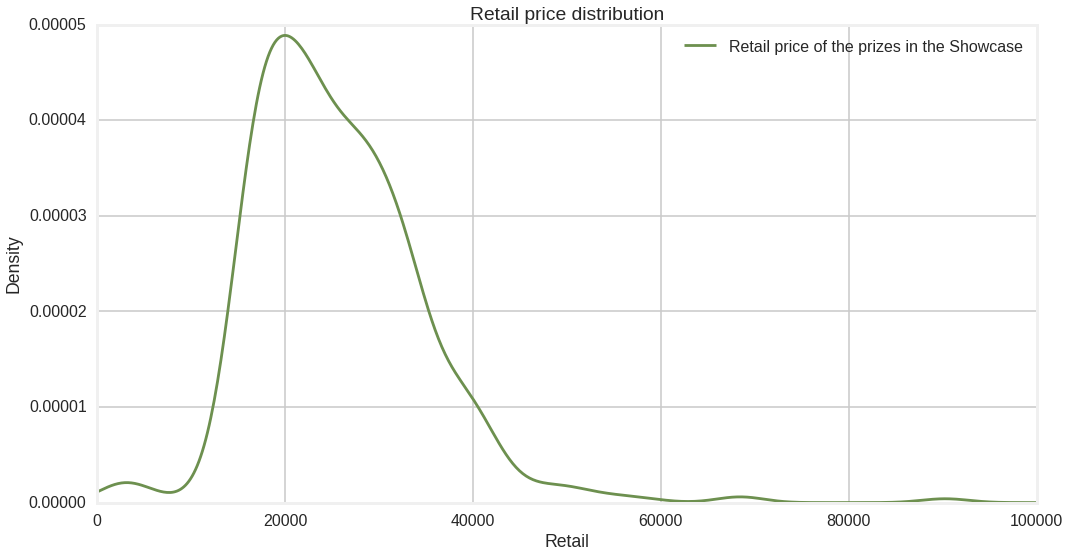

In [16]:
plots_dir = "plots/"
sns.set_context("poster")
plt.figure(figsize=(15,8))
retail_price=df.loc[:,'Price']
retail_price.plot(kind='kde',xlim=(0,100000),legend=True,label='Retail price of the prizes in the Showcase ')
pl.xlabel('Retail')
pl.title('Retail price distribution')
pl.legend()
pl.savefig(plots_dir+'retail_price'+'.png')
retail_price.describe()

OK, from previous *The Price is Right* episodes,  we have *prior* beliefs about what distribution the true price follows. For simplicity, suppose it follows a Normal:


$$\text{True Price} \sim \text{Normal}(\mu_p, \sigma_p ),$$ 

where

$$ \mu_p = 25663 $$

and 

$$ \sigma_p = 9324 $$


For each prize in the prize suite, we have an idea of what it might cost, but this guess could differ significantly from the true price. (You can couple this with increased pressure being onstage and you can see why some bids are so wildly off). Let's suppose your beliefs about the prices of prizes also follow Normal distributions:

$$\text{Prize}_i \sim \text{Normal}(\mu_i, \sigma_i ),\;\; i=1,2$$

This is really why Bayesian analysis is great: we can specify what we think a fair price is through the $\mu_i$ parameter, and express uncertainty of our guess in the $\sigma_i$ parameter. 

We'll assume two prizes per suite for brevity, but this can be extended to any number. 
The true price $\text{True Price}$ of the prize suite is then given by $\text{Prize}_1 + \text{Prize}_2 + \epsilon$, where $\epsilon$ is some error term.


$$\\[45pt]$$
**This is a brief  model of how we should be playing the *Showcase* **: 

* We update $\text{True Price}$ given we have observed both prizes and have belief distributions about them. We perform this using **PyMC**. The **ShowcaseModel** will be made.
* We define the machinery to make decisions based on the posterior knowledge of the $\text{True Price}$.
* This machinery makes the decision

It is important to understand that the machinery makes a decision about what the estimation of the total price for the prize suite we have to use in our answer.

$$\\[45pt]$$

Lets make some values concrete. 


Suppose we are in the studio of the *Game* and there are two prizes in our prize suite: 

1. A trip to wonderful Toronto, Canada! 
2. A lovely new snowblower!

We have some guesses about the true prices of these objects, but we are also pretty uncertain about them. I can express this uncertainty through the parameters of the Normals:


\begin{align}
& \text{snowblower} \sim \text{Normal}(3 000, 500 )\\\\
& \text{Toronto} \sim \text{Normal}(12 000, 3000 )\\\\
\end{align}

For example, I believe that the true price of the trip to Toronto is 12 000 dollars, and that there is a 68.2% chance that the price falls 1 standard deviation away from this, i.e. my confidence is that, there is a 68.2% chance (the chance with 68.2% probability) when the price of the trip falls in the range [9 000, 15 000].


$$\\[5pt]$$

### 0.5.2 The  Showcase Model

We can create some PyMC code to perform inference on the true price of the suite in this case. We define the Base interface for all our future bayesian models.

In [17]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A Base Class definitions.
'''


# Define a function for splitting train/test data.
def split_train_test(data, percent_test=0.1):
    """Split the data into train/test sets.
    :param int percent_test: Percentage of data to use for testing. Default 10%.
    """
    from sklearn.cross_validation import train_test_split

    train, test = train_test_split(data, test_size =percent_test)
    return train, test

# Define our evaluation function: RMSE - root mean squared error function
def rmse(test_data, predicted):      
    """
        Calculate root mean squared error.
        Ignoring missing values in the test data.
    """
    I = ~np.isnan(test_data)   # indicator for non-missing values
    N = I.sum()                # number of non-missing values
    sqerror = abs(test_data - predicted) ** 2  # squared error array
    mse = sqerror[I].sum() / N                 # mean squared error of all non-missing values
    return np.sqrt(mse)  



# Define the Basic class
class BaseModel(object):
    """ Base Class"""

    def __init__(self, train_data):
        # how many periods of the measurement we have
        self.num_entries = len(train_data)
        self.data = train_data
        self.traces = None
        self.predicted = None

    def predict(self, train_data):
        raise NotImplementedError(
            'prediction not implemented for base class')

        
    def prepare_trace(self):
        raise NotImplementedError(
            'preparing the traces not implemented for base class')

        
    def rmse(self, test_data):
        """Calculate root mean squared error for predictions on test data."""

        # rmse is a global function defined before
        return rmse(test_data, self.predicted)

Our model of the **Showcase** *True Price* and price of the prize suite is the following:

In [18]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A Model for the Showcase 
'''


#defines the class for the Modeling
class ModelShowcase(BaseModel):
    """ A ModelShowcase class 
         :param np.ndarray data: The  data to use for learning the model.
         :param list price_priory: priory knowledge on the prices of the prizes in the showcase         
    """


    def __init__(self, data,price_priory):        
    
        logging.info('building the  model....') 
        super(ModelShowcase,self).__init__( data )        

        # a priory on 'True Price'
        self.mu_prior = data.describe()['Price']['mean']
        self.std_prior = data.describe()['Price']['std']
        self.true_price = pm.Normal("true_price", self.mu_prior, 1.0 / self.std_prior ** 2)
            
        # a prior knowledge on the prices in the suite
        self.prize1 = pm.Normal("prize1", price_priory['prize1'][0], 1.0 / price_priory['prize1'][1] ** 2)
        self.prize2 = pm.Normal("prize2", price_priory['prize2'][0], 1.0 / price_priory['prize2'][1] ** 2)

        # determenistic total price of prizes
        self.price_estimate = self.prize1 + self.prize2

        # Here  we add the observed value via a 'Potential' Object.
        # This 'Potential' Object (function) plays a role of the Likelihood    
        @pm.potential
        def error(true_price=self.true_price, price_estimate=self.price_estimate):
            return pm.normal_like(true_price, price_estimate, 1 / (3e3) ** 2) # 3e3 is quite big std. deviation
        
        
        # our model collects all definitions in self.model        
        self.model = pm.MCMC([self.true_price, self.prize1,self.prize2,error,self.price_estimate])
        logging.info('done building the  model')



def _prepare_trace(self):
    ''' prepare a dataframe with traces of the parameters of 
        our model
    '''
    self.traces = pd.DataFrame({'true_price': self.true_price.trace(), 
                                'prize1': self.prize1.trace(),
                                'prize2': self.prize2.trace(),
                               })
    return  self.traces



# Update the interface of our model
ModelShowcase.prepare_trace = _prepare_trace
        
# priory knowkedge about prizes: 
price_priory = {
    'prize1':(3000,500), # A lovely new snowblower!
    'prize2':(12000,3000) #  A trip to wonderful Toronto, Canada! 
    }
showcase_model= ModelShowcase(df,price_priory)
showcase_model.model.sample(100000, 80000,20)
#showcase_model.model.sample(100000)


INFO:root:building the  model....
INFO:root:done building the  model


 [-----------------100%-----------------] 100000 of 100000 complete in 8.9 sec

Let's look at the obtained posterior distribution of **True Price**:

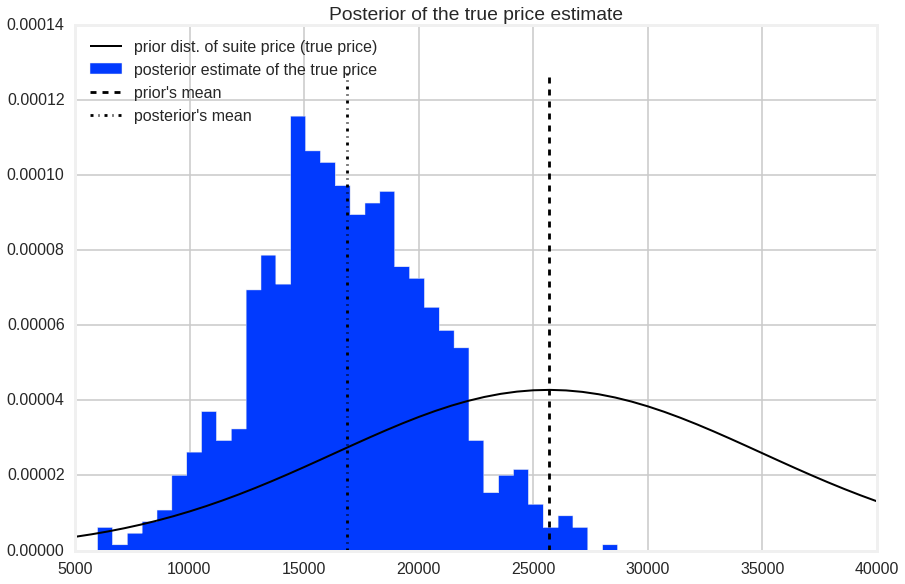

In [19]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    plotting support for ModelShowcase
'''


def _plot_posterior(self):
    ''' plot posterior distribution '''
    

    figsize(12.5, 4)

    import scipy.stats as stats
    

    x = np.linspace(5000, 40000) # in the range [5000,40000]
    plot(x, stats.norm.pdf(x, self.mu_prior, self.std_prior), c="k", lw=2,         
         label="prior dist. of suite price (true price)")
    
    
    traces=self.prepare_trace()
    _hist = plt.hist(traces['true_price'].values, bins=35, normed=True, label="posterior estimate of the true price" ,histtype="stepfilled")
    plt.title("Posterior of the true price estimate")
    plt.vlines(self.mu_prior, 0, 1.1 * np.max(_hist[0]), label="prior's mean",
           linestyles="--")
    plt.vlines(traces['true_price'].mean(), 0, 1.1 * np.max(_hist[0]),
           label="posterior's mean", linestyles="-.")
    plt.legend(loc="upper left")
    plots_dir='plots/'
    plt.savefig(plots_dir+'retail_price_posterior'+'.png')


# Update the interface of our model
ModelShowcase.plot_posterior = _plot_posterior    
showcase_model.plot_posterior()  

$$\\[5pt]$$

### 0.5.3 The machinery to make decisions

--------------



Noticing that because of our two observed prizes and subsequent guesses (including uncertainty about those guesses), we shifted our mean price estimate down about $10 000 dollars from the previous mean price.

1. A frequentist, seeing the two prizes and having the same beliefs about their prices, would bid $\mu_1 + \mu_2 = 25663$, regardless of any uncertainty. 

2. Meanwhile, the *naive Bayesian* would simply pick the mean of the posterior distribution. 


Here is our machinery of the  `DecisionMaker` for the estimation of the total price for prizes in these two cases.

In [20]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A Base Class definition for the Decision Makers.
'''




# Define the Basic class
class BaseDecision(object):
    """ BaseDecision Class"""

    def __init__(self, train_data):    
        self.num_entries = len(train_data)
        self.data = train_data

    def decide(self):
        ''' returns the value of estimated total price for prizes '''
        raise NotImplementedError(
            'prediction not implemented for base class')

        
    

$$\\[5pt]$$
What do  Frequentists decide about the price for the prize suite?

In [21]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

# Define the DecisionMaker for frequentists
class DecisionMakerFrequentists(BaseDecision):
    """ DecisionMakerFrequentists Class"""

    def __init__(self, prior_data):    
         
        logging.info('building the DecisionMakerFrequentists....') 
        super(DecisionMakerFrequentists,self).__init__( prior_data )      
        logging.info('building the DecisionMakerFrequentists....done') 

    def decide(self):
        ''' returns the value of estimated total price for prizes '''
        return self.data.describe()['Price']['mean']
    
    def __str__(self):
        return  "%s say: 'We think you have to bid %4.3f dollars USA'"%(self.__class__.__name__,self.decide())

frequentists_decision_maker = DecisionMakerFrequentists(df)
print frequentists_decision_maker

INFO:root:building the DecisionMakerFrequentists....
INFO:root:building the DecisionMakerFrequentists....done


DecisionMakerFrequentists say: 'We think you have to bid 25662.946 dollars USA'


$$\\[5pt]$$
What do  `Naive Bayesians` decide about the price for the prize suite?

In [22]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

# Define the DecisionMaker for Naive Bayesians
class DecisionMakerNaiveBayesians(BaseDecision):
    """ DecisionMakerNaiveBayesians Class"""

    def __init__(self, prior_data,model=None):    
         
        logging.info('building the DecisionMakerNaiveBayesians....') 
        super(DecisionMakerNaiveBayesians,self).__init__( prior_data )      
        self.model = model
        logging.info('building the DecisionMakerNaiveBayesians....done') 
        

    def decide(self):
        ''' returns the value of estimated total price for prizes '''
        if (self.model is None): return 1e6
            
        traces=self.model.prepare_trace()        
        return traces['true_price'].mean()
    
    def __str__(self):
        return  "%s say: 'We think you have to bid %4.3f dollars USA'"%(self.__class__.__name__,self.decide())

naivebayesians_decision_maker = DecisionMakerNaiveBayesians(df,showcase_model)
print naivebayesians_decision_maker

INFO:root:building the DecisionMakerNaiveBayesians....
INFO:root:building the DecisionMakerNaiveBayesians....done


DecisionMakerNaiveBayesians say: 'We think you have to bid 16850.958 dollars USA'


$$\\[5pt]$$
But we have more information about our eventual outcomes; we should incorporate this into our bid. We will use the loss function above to find the *best* bid (*best* according to our loss).

$$\\[5pt]$$

### 0.5.4 The Decisions Making machinery with the Bayes rule

--------------


First, we define the Loss function $L(\theta,\hat\theta)$ as follows, recalling 
the conditions
>* If a bid price is over the actual price, the bid's owner is disqualified from winning.
>5. If a bid price is under the true price by less than $250, the winner is awarded both 

    def loss(true_price,guess,risk=80000):
        ''' returns the loss value '''
        
        # Ups, we are disqualified ?!
        if true_price < guess:
            return risk 


        # Woooooow we are awarded!
        elif abs(true_price - guess) <= 250:
            return -2*np.abs(true_price)


        # We missed to predict true_price, but we were  close to it ....
        else:
            return np.abs(true_price - guess - 250)

where `risk` is a parameter that defines of how bad it is if your guess is over the true price. A lower `risk` means that you are more comfortable with the idea of going over.
If we do bid under and the difference is less than $250, we receive both prizes (modeled here as receiving twice the original prize). Otherwise, when we bid under the `true_price` we want to be as close as possible, hence the `else` loss is a increasing function of the distance between the guess and true price.

In [23]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

# Define the DecisionMaker for Bayesians utilizing the Bayes rule
class DecisionLossBayesians(BaseDecision):
    """ DecisionLossBayesians Class"""

    def __init__(self, prior_data,model=None):    
         
        logging.info('building the DecisionLossBayesians....') 
        super(DecisionLossBayesians,self).__init__( prior_data )      
        self.model = model
        self.traces=None
        logging.info('building the DecisionLossBayesians....done') 
        
    
    def __str__(self):
        return  "%s say: 'We think you have to bid %4.3f dollars USA'"%(self.__class__.__name__,self.decide())
    
    
    def loss(self,true_price,guess,risk=80000):
        ''' returns the loss value '''
        
        # Ups, we are disqualified ?!
        if true_price < guess:
            return risk 


        # Woooooow we are awarded!
        elif abs(true_price - guess) <= 250:
            return -2*np.abs(true_price)


        # We missed to predict true_price, but we were  close to it ....
        else:
            return np.abs(true_price - guess - 250)
    
lossbayesians_decision_maker = DecisionLossBayesians(df,showcase_model)

INFO:root:building the DecisionLossBayesians....
INFO:root:building the DecisionLossBayesians....done


Let's add **posterior risk** to our `DecisionLossBayesians`:

In [24]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

def _posterior_risk(self,rule,risk=80000):
    ''' here rule is a guess of the price of the prize suite '''
    
    if (self.traces is None):  self.traces = self.model.prepare_trace()
    self.traces['posterior_risk'] = self.traces.apply(
        lambda x: self.loss(x['true_price'],rule,risk),        
         axis=1
        )
    
    return self.traces['posterior_risk'].values


# Update the definition of the DecisionLossBayesians
DecisionLossBayesians.posterior_risk = _posterior_risk
lossbayesians_decision_maker.posterior_risk(1000)[0:10]

array([ 11691.16368355,  17278.25882064,  18758.79895935,  17176.76847303,
        16539.20239225,  11228.87261291,  13511.96226114,  18198.09713237,
        17651.353225  ,  24510.8764822 ])



<!--bibtex


@Article{WARNER,
  Author    = {D. WARNER NORTH},
  Title     = {A Tutorial Introduction to Decision Theory},  
  url       = "https://drive.google.com/file/d/0B5OwgVT-YmdbVDdYVFk2LXlxVWc/view?usp=sharing",
  
}


@Article{Risk_aversion,
  Author    = {Wikimedia Foundation, Inc},
  Title     = {Risk aversion},
  Journal   = {Wikipedia},      
  month     = august,
  year      = 2015,
  url       = "https://en.wikipedia.org/wiki/Risk_aversion",
  
}

@Article{James_DT,
  Author    = {F. James},
  Title     = {Decision Theory},
  url       = "https://www.luminpdf.com/viewer/SJqiwgnfkYz9gqQHP?sk=336a7cb6-5f20-421a-9ff2-6540eea71c7e",
  
}

@Article{Jordan_DT,
  Author    = { Michael I. Jordan},
  Title     = {Lecture3: Decision theory},
  url       = "http://www.cs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture3.pdf",
  
}

@Article{Price_List,
  Author    = {http://www.datagrabber.org},
  Title     = {Showcase Price List},
  url       = "http://www.datagrabber.org/welcome-to-datagrabber-org/price-is-right-showcase-cheat-prices/",
  
}



... Other Bibtex entries go here.

-->



    

Let's add **Bayes loss**  and **Bayes rule** to our `DecisionLossBayesians` class

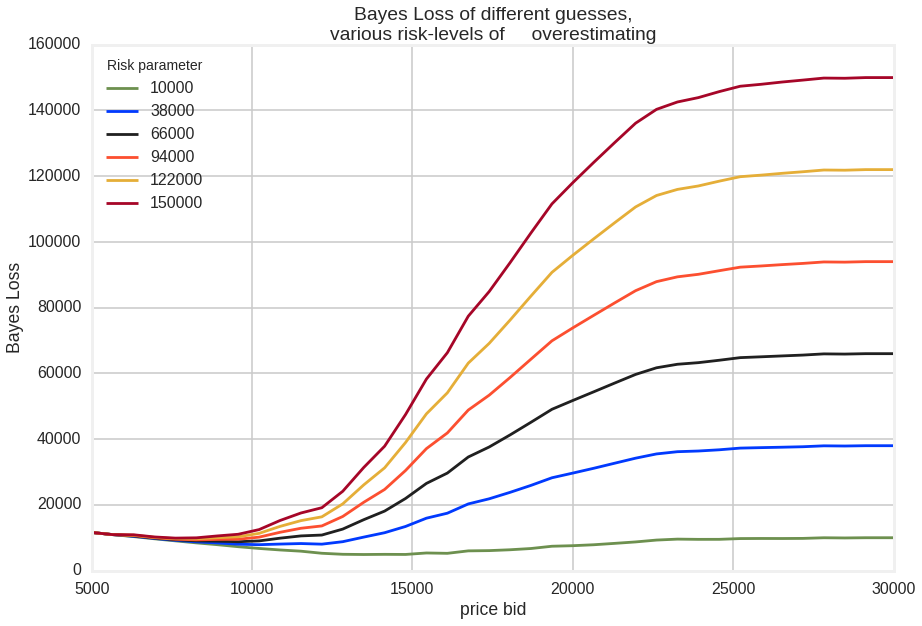

In [25]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

def _bayes_loss(self,rule,risk=80000):
    ''' returns the bayes loss'''
    

    return np.mean(self.posterior_risk(rule,risk))


def _plot_bayes_loss(self):
    ''' plot  the bayes risk of diffent rules (guesses) at different risk thresholds '''
    
    figsize(12.5, 7)
    guesses = np.linspace(5000, 50000, 70)
    risks = np.linspace(10000, 150000, 6)
    
    for _p in risks:
        results = [self.bayes_loss(_g, _p) for _g in guesses]
        plt.plot(guesses, results, label="%d" % _p)

    plt.title("Bayes Loss of different guesses, \nvarious risk-levels of \
    overestimating")
    plt.legend(loc="upper left", title="Risk parameter")
    plt.xlabel("price bid")
    plt.ylabel("Bayes Loss")
    
    plt.xlim(5000, 30000);

# Update the definition of the DecisionLossBayesians
DecisionLossBayesians.bayes_loss = _bayes_loss
DecisionLossBayesians.plot_bayes_loss = _plot_bayes_loss
lossbayesians_decision_maker.plot_bayes_loss()

Bayes rule (minimum) at risk parameter 10000: 14553.08
Bayes rule (minimum) at risk parameter 58000: 9261.83
Bayes rule (minimum) at risk parameter 106000: 7883.86
Bayes rule (minimum) at risk parameter 154000: 7883.86
Bayes rule (minimum) at risk parameter 202000: 7767.02
Bayes rule (minimum) at risk parameter 250000: 7583.94


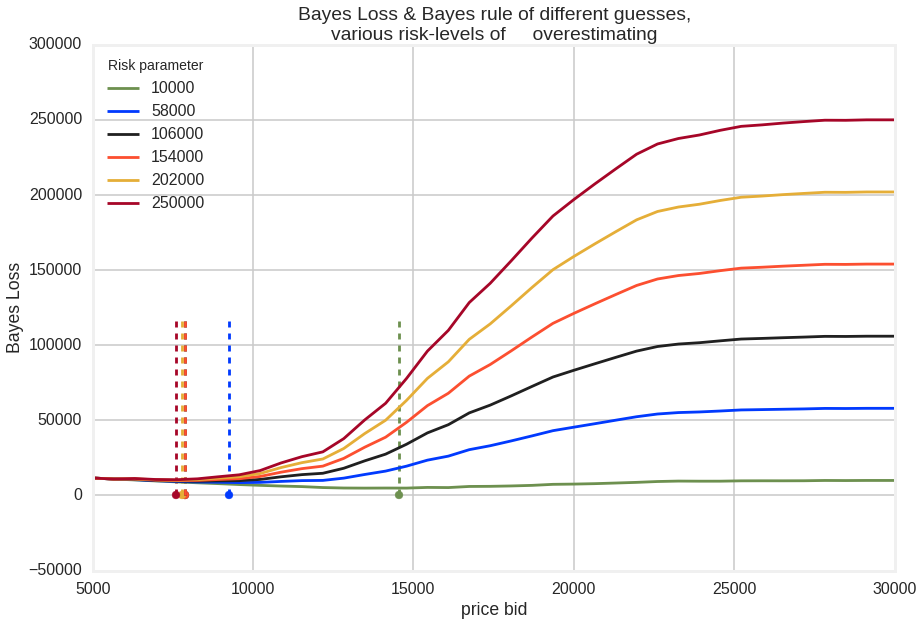

In [27]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

def _bayes_risk(self,risk=80000):
    ''' returns the bayes risk and bayes rule '''
    
    import scipy.optimize as sop

    
    bayes_rule=sop.fmin(self.bayes_loss, 15000,args=(risk,), disp=False)[0]
    return  self.bayes_loss(bayes_rule,risk),bayes_rule


def _plot_bayes_risk(self):
    ''' plot  the bayes risk of diffent rules (guesses) at different risk thresholds '''
    
    figsize(12.5, 7)
    guesses = np.linspace(5000, 50000, 70)
    risks = np.linspace(10000, 250000, 6)
    ax = plt.subplot(111)
    
    for _p in risks:
        _color = ax._get_lines.color_cycle.next()
        _min_results = self.bayes_risk(_p)[1]
        results = [self.bayes_loss(_g, _p) for _g in guesses]
        plt.plot(guesses, results,color=_color, label="%d" % _p)
        plt.scatter(_min_results, 0, s=60, color=_color)
        plt.vlines(_min_results, 0, 120000, color=_color, linestyles="--")
        print "Bayes rule (minimum) at risk parameter %d: %.2f" % (_p, _min_results)

    plt.title("Bayes Loss & Bayes rule of different guesses, \nvarious risk-levels of \
    overestimating")
    plt.legend(loc="upper left", title="Risk parameter")
    plt.xlabel("price bid")
    plt.ylabel("Bayes Loss")
    
    plt.xlim(5000, 30000);
    

# Update the definition of the DecisionLossBayesians
DecisionLossBayesians.bayes_risk = _bayes_risk
DecisionLossBayesians.plot_bayes_risk = _plot_bayes_risk
lossbayesians_decision_maker.plot_bayes_risk()

As intuition suggests, as we decrease the risk threshold (care about overbidding less), we increase our bid, willing to edge closer to the true price. It is interesting how far away our optimized loss is from the posterior mean, which was about 16691. 

Suffice to say, in higher dimensions being able to eyeball the minimum expected loss is impossible. Hence why we require use of Scipy's `fmin` function.

$$\\[5pt]$$
What do  `Bayesians` using **Bayes rule**  decide about the price for the prize suite?

In [28]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

def _decide(self,risk=10000):
        ''' returns the value of estimated total price for prizes '''
        if (self.model is None): return 1e6
            
            
        return self.bayes_risk(risk)[1]
    

# Update the definition of the DecisionLossBayesians
DecisionLossBayesians.decide = _decide
print lossbayesians_decision_maker

DecisionLossBayesians say: 'We think you have to bid 14553.082 dollars USA'


$$\\[10pt]$$

## 0.6 Machine Learning with the Bayes Risk

-------------------------------


Whereas **frequentist methods** strive to achieve the **best precision about all possible parameters**, **machine learning** cares to achieve the **best prediction among all possible parameters**. Of course, one way to achieve accurate predictions is to aim for accurate predictions, but often your prediction measure and what frequentist methods are optimizing for are very different. 


For example, **least-squares linear regression** is the most simple active machine learning algorithm. I say active as it engages in some learning, whereas predicting the sample mean is technically simpler, but is learning **very little if anything**. The loss that determines the coefficients of the regressors is a **squared-error loss**.
On the other hand, if your prediction loss function (or score function, which is the negative loss) is not a squared-error, like **AUC, ROC, precision,** etc., your least-squares line will **not be optimal** for the prediction loss function. This can lead to prediction results that are **suboptimal**. 


Finding Bayes rules is equivalent to finding parameters that **optimize not parameter accuracy (!!)** but **an arbitrary performance measure (!!)**, we wish to define performance (loss functions, AUC, ROC, precision/recall etc.).


The next two examples demonstrate these ideas. The first example is a linear model where we can choose to predict using the least-squares loss or a novel, outcome-sensitive loss.

The second example is adapted from a Kaggle data science project. The loss function associated with our predictions is incredibly complicated.

$$\\[10pt]$$

### 0.6.1 An Example: Financial prediction

---------------------------------



Suppose the future return of a stock price is very small, say 0.01 (or 1%). We have a model that predicts the stock's future price, and our profit and loss is directly tied to us acting on the prediction.  How should we measure the loss associated with the model's predictions, and subsequent future predictions? A squared-error loss is agnostic to the signage and would penalize a prediction of -0.01 equally as bad a prediction of 0.03:

$$ (0.01 - (-0.01))^2 = (0.01 - 0.03)^2 = 0.004$$

If you had made a bet based on your model's prediction, you would have earned money with a prediction of 0.03, and lost money with a prediction of -0.01, yet our loss did not capture this. We need a better loss that takes into account the *sign* of the prediction and true value. We design a new loss that is better for financial applications below:


* if the `predicted return` > `true return`, we earn money
* if the `predicted return` < `true return`, we loss money and it is very bad!

    
    def stock_loss(true_return, yhat, alpha=100.):
        ''' defines the loss on the stock price '''
        if true_return * yhat < 0:
            # opposite signs, not good
            # loss is the function of the squared yhat and linear true_return
            
            return alpha * yhat ** 2 - np.sign(true_return) * yhat \
            + abs(true_return) 
        else:
            return abs(true_return - yhat)

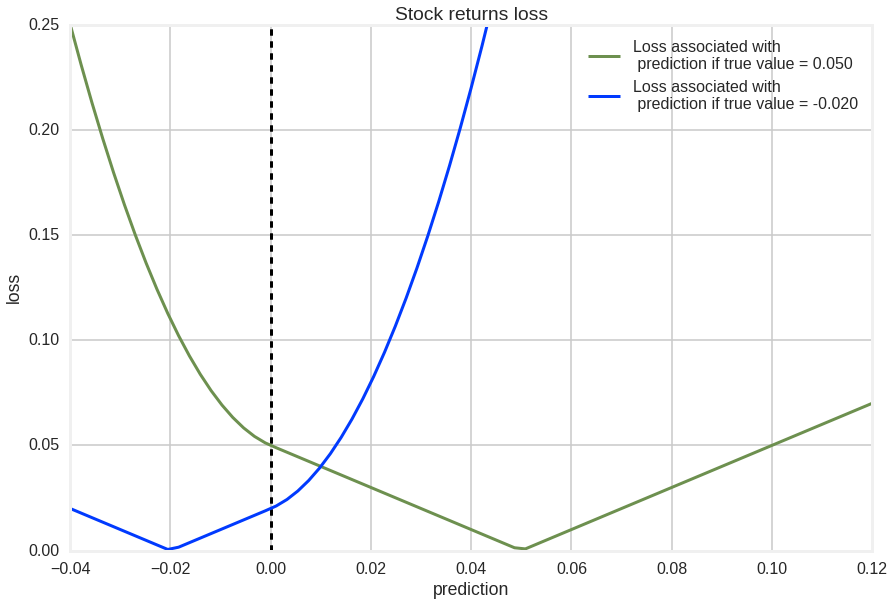

In [29]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers for the financial predictions
'''


def stock_loss(true_return, yhat, alpha=100.):
        ''' defines the loss on the stock price '''
        if true_return * yhat < 0:
            # opposite signs, not good
            # loss is the function of the squared yhat and linear  true_return
            return alpha * yhat ** 2 - np.sign(true_return) * yhat \
            + abs(true_return) 
        else:
            return abs(true_return - yhat)
        
        
def plot_stock_loss(true_value = .05):
    ''' plot the stock loss '''
    
    
    pred = np.linspace(-.04, .12, 75)
    plt.plot(pred, [stock_loss(true_value, _p) for _p in pred],
         label="Loss associated with\n prediction if true value = %2.3f"%true_value, lw=3)
    plt.vlines(0, 0, .25, linestyles="--")

    plt.xlabel("prediction")
    plt.ylabel("loss")
    plt.xlim(-0.04, .12)
    plt.ylim(0, 0.25)
    plt.legend()
    plt.title("Stock returns loss ");

plot_stock_loss(true_value = .05)    
plot_stock_loss(true_value = -.02)    
    

**Note the change in the shape of the loss as the prediction crosses zero. This loss reflects that the user really does not want to guess the wrong sign, especially be wrong *and* a large magnitude. **

Financial institutions usualy operate with *downside* and *upside* risks:

* *downside risk* --  predicting a lot on the wrong side 
* *upside risk* --  predicting a lot on the right side. 

Both are seen as risky behaviour and discouraged. Hence why we have an increasing loss as we move further away from the true price. ***(With less extreme loss in the direction of the correct sign.)***


We will perform a regression on a trading signal that we believe predicts future returns well.

$$\\[10pt]$$

### 0.6.2 Get the Financial data from Google: stock prices of Apple Inc.

---------------------------------


In Google Finance, intra-day data (stock prices down to two minute resolution) is available free for several stock markets. The list of the markets can be found here 
<a name="ref-9"/>[(GoogleFinance, 2015)](#cite-Google_marketlist).

Maximillian Vitek has developed  a simple python  API that returns csv formatted intra-day data from the Google service <a name="ref-10"/>[(MaximillianVitek, 2014)](#cite-MaximillianVitek).

We are going to use this tool to obtain historical data  observed yersterday (13.08.2015).

In [28]:
! git clone https://github.com/maxvitek/intradata


Cloning into 'intradata'...
remote: Counting objects: 54, done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 54 (delta 20), reused 54 (delta 20), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [30]:
# %load intradata/intradata.py
import time
import datetime
import pandas
import requests
import csv
import io
import pytz

PROTOCOL = 'http://'
BASE_URL = 'www.google.com/finance/getprices'


def get_google_data(symbol, interval=60, lookback=1, end_time=time.time()):
    """
    Get intraday data for the symbol from google finance and
    return a pandas DataFrame
    :param symbol (str)
    :param interval (int)
    :param lookback (int)
    :param end_time (unix timestamp)
    :returns pandas.DataFrame
    """
    resource_url = PROTOCOL + BASE_URL
    payload = {
        'q': symbol,
        'i': str(interval),
        'p': str(lookback) + 'd',
        'ts': str(int(end_time * 1000)),
        'f': 'd,o,h,l,c,v'
    }

    r = requests.get(resource_url, params=payload)

    quotes = []

    with io.BytesIO(r.content) as csvfile:
        quote_reader = csv.reader(csvfile)
        timestamp_start = None
        timestamp_offset = None
        timezone_offset = 0
        for row in quote_reader:
            if row[0][:16] == 'TIMEZONE_OFFSET=':
                timezone_offset = -1 * int(row[0][16:])
            elif row[0][0] not in 'a1234567890':  # discard headers
                continue
            elif row[0][0] == 'a':  # 'a' prepended to the timestamp that starts each day
                timestamp_start = pytz.utc.localize(datetime.datetime.fromtimestamp(float(row[0][1:]))
                                                    + datetime.timedelta(minutes=timezone_offset))
                timestamp_offset = 0
            elif timestamp_start:
                timestamp_offset = int(row[0])

            if not timestamp_start and not timestamp_offset:
                continue

            timestamp = timestamp_start + datetime.timedelta(seconds=timestamp_offset * interval)
            closing_price = float(row[1])
            high_price = float(row[2])
            low_price = float(row[3])
            open_price = float(row[4])
            volume = float(row[5])

            quotes.append((timestamp, closing_price, high_price, low_price, open_price, volume))

    df = pandas.DataFrame(quotes, columns=['datetime', 'close', 'high', 'low', 'open', 'volume'])
    df = df.set_index('datetime')

    return df

Let's get the prices of the **Apple Inc.** stocks from yesterday (2015/09/25):

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.google.com


total 782 recordes downloaded from Google Finance
total 661 recordes selected 


,close,high,low,open,volume
datetime,,,,,
2015-09-24 19:30:00+00:00,113.29,113.33,113.24,113.25,316231
2015-09-24 19:31:00+00:00,113.32,113.58,113.25,113.32,206457
2015-09-24 19:32:00+00:00,113.40,113.42,113.26,113.37,159438


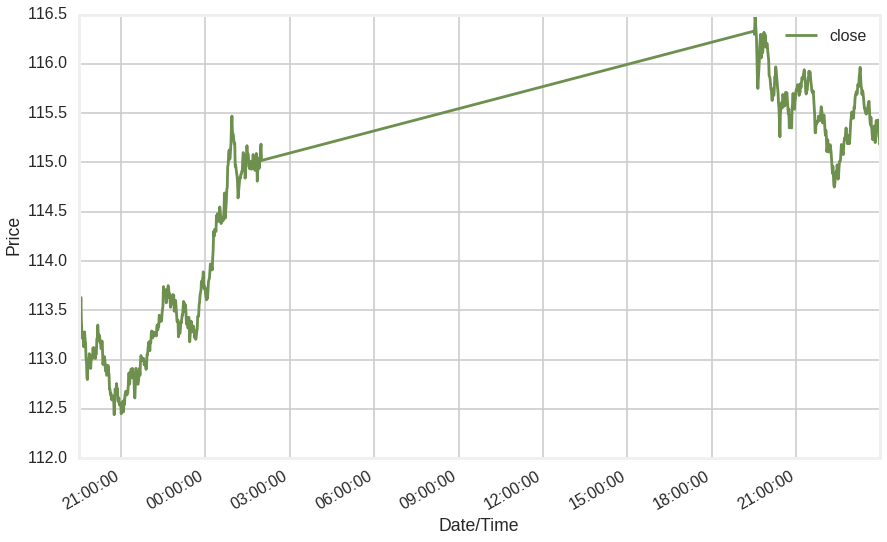

In [31]:
import time
import datetime
end_date_time = "2015-09-25 00:00:00.00"
# interval=60 -- get ticks each  minute
aapl = get_google_data('AAPL',interval=60, lookback=2, end_time=time.mktime(time.strptime(end_date_time, "%Y-%m-%d %H:%M:%S.%f")))

print "total %d recordes downloaded from Google Finance"%len(aapl)

# remove todays data
today_date_time = "2015-09-26 00:00:00.00"
today_date_time=datetime.datetime.fromtimestamp(time.mktime(time.strptime(today_date_time, "%Y-%m-%d %H:%M:%S.%f")))
aapl=aapl.loc[aapl[aapl.index<today_date_time].index,:]
aapl=aapl.reset_index()
aapl=aapl.set_index('datetime')
print "total %d recordes selected "%len(aapl)
aapl[['close']].plot(label='close price')
plt.xlabel("Date/Time")
plt.ylabel("Price")
    
aapl.head(3)


$$\\[10pt]$$

### 0.6.3 Ordinary Least Square Fit on the Apple stock prices

---------------------------------

Now let's make OLS on the `close` prices of ticks with numbers from interval [1,200] entries of our ticks and plot it:

,close_pct_change,high_pct_change,low_pct_change,open_pct_change,volume_pct_change,close,high,low,open,volume,tick_id
0,0.000265,0.002206,0.000088,0.000618,-0.347132,113.32,113.58,113.25,113.32,206457,1


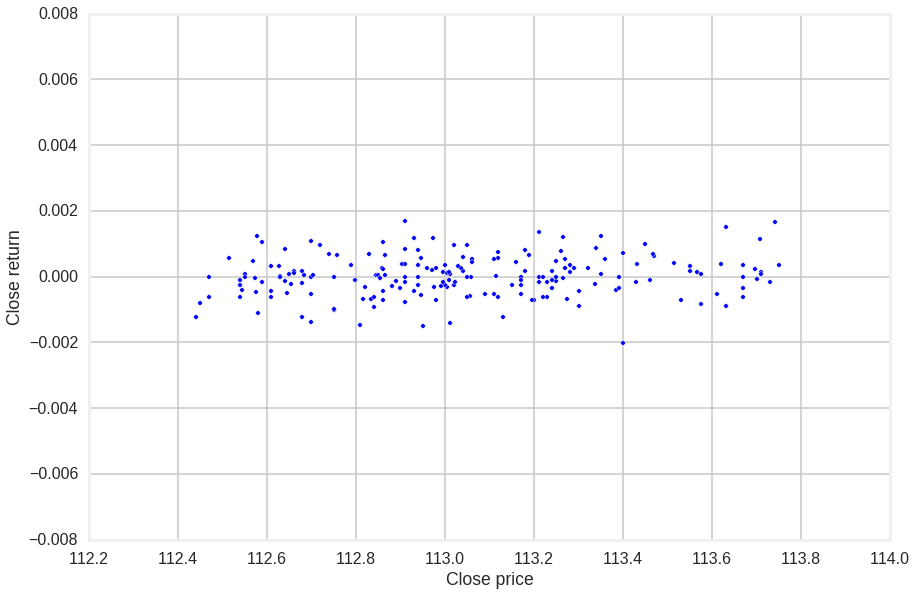

In [32]:
# copy aapl dataset to make the new dataset aapl_ols
_aapl = aapl.copy()

# prepare the data for OLS,
# on which we want to make a regression: we use first [0,200] ticks.
# The regression formula is "return ~ close +intercept"

tick_first=1
tick_last=200

# reset index 
aapl_ols=_aapl.reset_index(drop=True)

_aapl['tick_id'] = aapl_ols.index.values

# select first 200 ticks with id from ...
_aapl=_aapl.loc[_aapl[
        (_aapl['tick_id'] >= tick_first) & 
        (_aapl['tick_id'] <= tick_last)
            ].index
                     ]



# make returns and rename columns
aapl_ols=aapl_ols.pct_change()
aapl_ols.columns = [column + '_pct_change' for column in aapl_ols.columns ]
#  add tick_id
aapl_ols['tick_id'] = aapl_ols.index.values


# select first 200 ticks with id from ...
aapl_ols=aapl_ols.loc[aapl_ols[
        (aapl_ols['tick_id'] >= tick_first) & 
        (aapl_ols['tick_id'] <= tick_last)
            ].index
                     ]
# drop the tick_id_pct_change column
aapl_ols = pd.merge(aapl_ols, _aapl, on=aapl_ols.tick_id, how='outer')
aapl_ols=aapl_ols.drop('tick_id_x', 1).rename(columns = {'tick_id_y':'tick_id'})

plt.scatter(aapl_ols.close, aapl_ols.close_pct_change)
plt.xlabel("Close price")
plt.ylabel("Close return")

aapl_ols.head(1)


Intercept   -0.029138
close        0.000258
dtype: float64


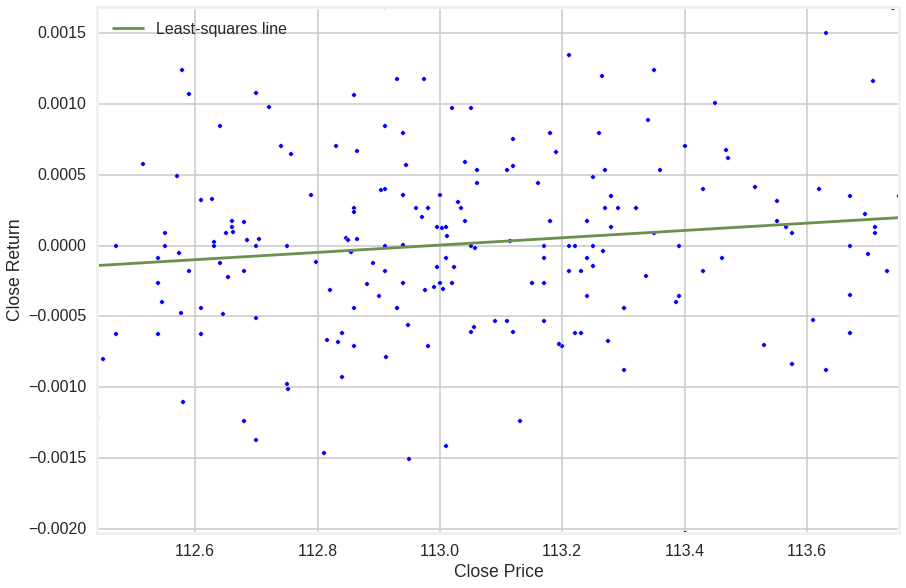

In [33]:
import statsmodels.formula.api as sm
result = sm.ols(formula="close_pct_change ~ close", data=aapl_ols).fit()
print result.params
plt.scatter(aapl_ols.close, aapl_ols.close_pct_change)
Y=aapl_ols.close_pct_change.values
X = aapl_ols.close.values
ls_intercept = result.params['Intercept']
ls_coef_ = result.params['close']
plt.plot(np.sort(X), ls_coef_ * np.sort(X) + ls_intercept, label="Least-squares line")
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.legend(loc="upper left")
plt.xlabel("Close Price")
plt.ylabel("Close Return")


$$\\[10pt]$$

### 0.6.4 Decision Maker with the Bayes rule  to predict prices of  the Apple stock

**Now we want to predict the return for the upcomming  prices**.

To do this we create the `DecisionMaker` with the Bayes rule calculation. Our plan of 
next steps is 

* Make a simple Bayesian linear regression (model) on this dataset;
* Develop DecisionMaker with the Bayes rule using the stock loss function.

We look for the regression model like:

$$ R = \alpha + \beta x + \epsilon$$

where $\alpha, \beta$ are our unknown parameters and $\epsilon \sim \text{Normal}(0, 1/\tau)$. The most common priors on $\beta$ and $\alpha$ are Normal priors. We will also assign a prior on $\tau$, so that $\sigma = 1/\sqrt{\tau}$ is uniform over 0 to 100 (equivalently then $\tau = 1/\text{Uniform}(0, 100)^2$).

In [34]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A Model the Financial Example
'''


#defines the class for the Modeling
class ModelStock(BaseModel):
    """ A ModelStock class 
         :param np.ndarray data: The  data to use for learning the model.         
    """


    def __init__(self, data,std_value=100.):        
    
        logging.info('building the  model....') 
        super(ModelStock,self).__init__( data )        

        # priors on the parameters of the model
        
        # std deviation parameter
        self.std = pm.Uniform("std", 0, std_value, trace=False)  # this needs to be explained.
        
        # tau -- a precision parameter
        @pm.deterministic
        def tau(U=self.std):
            return 1.0 / (U) ** 2

        # alpha and beta parameters 
        self.beta = pm.Normal("beta", 0, 1./(std_value**2) if std_value >0. else 0.0001)
        self.alpha = pm.Normal("alpha", 0,1./(std_value**2) if std_value >0. else  0.0001)


        # the regression model
        self.X=self.data['close'].values
        @pm.deterministic
        def mean(X=self.X, alpha=self.alpha, beta=self.beta):
            return alpha + beta * X
        
        # here we define what we observe
        self.Y=self.data['close_pct_change'].values
        self.obs = pm.Normal("obs", mean, tau, value=self.Y, observed=True)
        
        
        # our model collects all definitions in self.model        
        self.model = pm.MCMC([self.beta, self.alpha,self.obs,mean,tau,self.std,self.X,self.Y])
        logging.info('done building the  model')



def _prepare_trace(self):
    ''' prepare a dataframe with traces of the parameters of 
        our model
    '''
    
    self.traces={
        'beta': self.beta.trace(), 
        'alpha': self.alpha.trace(),
      }
    
    for var in list(self.model.deterministics):        
        if (str(var) == 'mean'): continue
        self.traces.update(               
                {str(var):np.array(self.model.trace(str(var))[:])}
            )
    self.traces=pd.DataFrame(self.traces)
    return  self.traces



# Update the interface of our model
ModelStock.prepare_trace = _prepare_trace

_aapl_ols=aapl_ols.copy()
_aapl_ols=_aapl_ols.sort(columns="close")
modelstock_model= ModelStock(_aapl_ols)
modelstock_model.model.sample(100000, 80000,20)

INFO:root:building the  model....
INFO:root:done building the  model


 [-----------------100%-----------------] 100000 of 100000 complete in 14.8 sec

Let's make diagnostic of the MCMC chain:

Plotting beta
Plotting tau
Plotting alpha


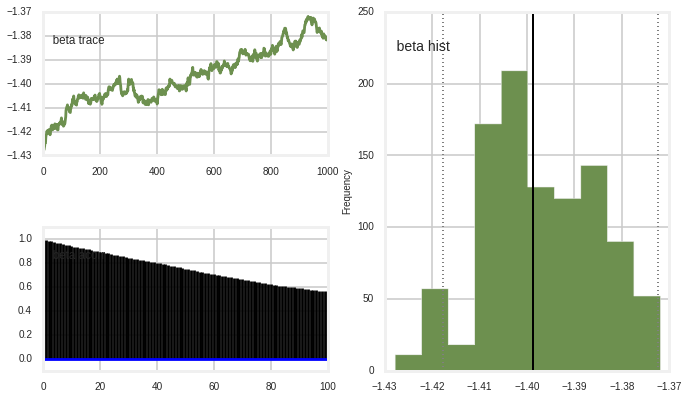

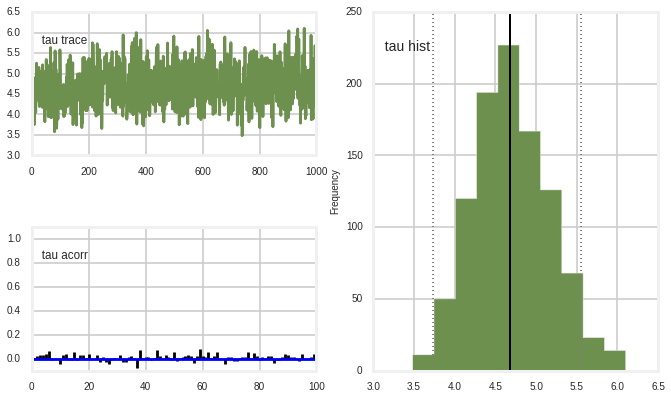

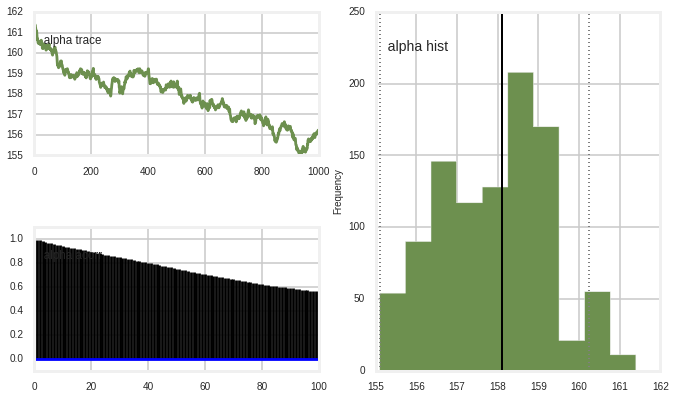

In [35]:
from pymc.Matplot import plot as mcplot
mcplot(modelstock_model.model,path="plots/")

Now let's repeat all steps of the creation of  Decision Makers with the Bayes Risk Management,
that we have made for the *Showcase* example.

In [53]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

# Define the DecisionMaker for Bayesians utilizing the Bayes rule
class DecisionStockLossBayesians(BaseDecision):
    """ DecisionStockLossBayesians Class"""

    def __init__(self, prior_data,model=None):    
         
        logging.info('building the DecisionStockLossBayesians....') 
        super(DecisionStockLossBayesians,self).__init__( prior_data )      
        self.model = model
        self.traces=None
        self.noises=None
        logging.info('building the DecisionStockLossBayesians....done') 
        
    
    def __str__(self):
        return  "%s say: 'We predict the %3.2f return  '"%(self.__class__.__name__,self.decide())
    
    
    
    def loss(self,true_return, yhat, alpha=100.):
        ''' defines the loss on the stock price '''
        if true_return * yhat < 0:
            # opposite signs, not good
            # loss is the function of the squared yhat and linear  true_return
            return alpha * yhat ** 2 - np.sign(true_return) * yhat \
            + abs(true_return) 
        else:
            return abs(true_return - yhat)
    
stocklossbayesians_decision_maker = DecisionStockLossBayesians(modelstock_model.data,modelstock_model)

INFO:root:building the DecisionStockLossBayesians....
INFO:root:building the DecisionStockLossBayesians....done


In [92]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

stocklossbayesians_decision_maker.traces=None
def _posterior_risk(self,close_price,rule,alpha=100.):
    ''' here rule is a guess of the price of the prize suite '''
    
    if (self.traces is None): 
        self.traces = self.model.prepare_trace()
    self.alphas = self.traces['alpha'].values
    self.betas = self.traces['beta'].values            
    self.taus = self.traces['tau'].values     
    N=self.taus.shape[0] 
    self.noises = 1. / np.sqrt(self.taus) * np.random.randn(N)
    
    
    func= lambda x: self.loss(x,rule,alpha)
    return np.array([func(x) for x in self.alphas + self.betas*close_price + self.noises ])
    
    #self.traces['posterior_risk'] = self.traces.apply(
    #    lambda x: self.loss(x['alpha'] + x['beta']*close_price+\
    #                        1./np.sqrt(x['tau'])* np.random.randn(),
    #                        rule,alpha),        
    #     axis=1
    #    )
    
    #return self.traces['posterior_risk'].values


def _bayes_loss(self,rule,close_price,alpha=100.):
    ''' returns the bayes loss'''
    return np.mean(self.posterior_risk(close_price,rule,alpha))


def _bayes_risk(self,close_price,alpha=100.):
    ''' returns the bayes risk and bayes rule '''
    
    import scipy.optimize as sop

    
    bayes_rule,bayes_loss,_,_,_=sop.fmin(self.bayes_loss, 0.,args=(close_price,alpha,),full_output=True, disp=False)
    bayes_rule=bayes_rule[0]
    return  bayes_loss,bayes_rule



# Update the definition of the DecisionLossBayesians
DecisionStockLossBayesians.posterior_risk = _posterior_risk
DecisionStockLossBayesians.bayes_loss = _bayes_loss
DecisionStockLossBayesians.bayes_risk = _bayes_risk

# test: Bayes Loss at our guess of -0.001 for the close_price=160.
print stocklossbayesians_decision_maker.bayes_loss(-0.001,160.)

# test: Bayes Risk for the close_price=160.
print stocklossbayesians_decision_maker.bayes_risk(160.)

65.6006757262
(65.561155894085914, -0.00019043731685087546)


Now, let's predict the return of the 'close' prices using the Bayes rule in our decision (it will take some time to calculate the result):

In [72]:
predicted_pct_change=[]
for idx in range(len(stocklossbayesians_decision_maker.data)):
    if (idx%10==0): print 'Current entry %d'%idx
    close_price=stocklossbayesians_decision_maker.data.loc[idx,'close']
    predicted_pct_change+=[stocklossbayesians_decision_maker.bayes_risk(close_price)[1]]
    #stocklossbayesians_decision_maker.data.loc[idx,'predicted_pct_change']= stocklossbayesians_decision_maker.bayes_risk(close_price)

Current entry 0
Current entry 10
Current entry 20
Current entry 30
Current entry 40
Current entry 50
Current entry 60
Current entry 70
Current entry 80
Current entry 90
Current entry 100
Current entry 110
Current entry 120
Current entry 130
Current entry 140
Current entry 150
Current entry 160
Current entry 170
Current entry 180
Current entry 190


Here is the distribution of the predicted returns:

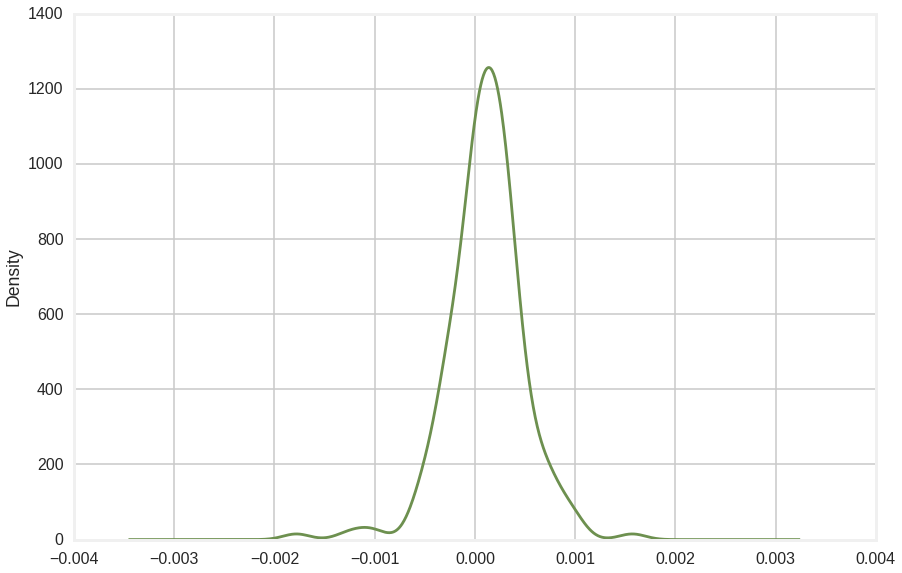

In [73]:
stocklossbayesians_decision_maker.data['predicted_pct_change'] = np.array(predicted_pct_change)
stocklossbayesians_decision_maker.data['predicted_pct_change'].plot(kind='kde')

In order to use the obtained predicted returns  as a function of the close prices, 
I will introduce a function which will not only interpolate predicted returns but also extrapolate them if the close price comes outside the region defined by the first 200 ticks.

First, I sort in descending order the data according to the close prices.

In [74]:
_data=stocklossbayesians_decision_maker.data.copy()
_data=_data.sort(columns="close")

Then I study possible interpolation modes and introduce the extrapolation function: 

In [86]:
import scipy.interpolate as sci
kind='linear'
interpolate = sci.interp1d(
    stocklossbayesians_decision_maker.data['close'].values,
    stocklossbayesians_decision_maker.data['predicted_pct_change'].values,
    kind=kind)
min_X =  stocklossbayesians_decision_maker.data['close'].min()
max_X =  stocklossbayesians_decision_maker.data['close'].max()
print "The (min,max) close price values  = (%f,%f)"%(min_X,max_X)
print "Interpolation at %f gives %f"%((max_X+min_X)/2.,interpolate((max_X+min_X)/2.))


def extrapolate(x_orig,y_orig,X):
    ''' makes interpolation or extrapolation '''
    
    
    from scipy.interpolate import interp1d

    # Original data
    x =x_orig
    y =y_orig
    xmin=min(x)
    xmax=max(x)
    # Interpolator class
    f = interp1d(x, y,kind='linear')
    f2 = interp1d(x, y,kind='cubic')

    if (X>=xmin) and (X<=xmax): return f(X)
    
    # Output range (quite large)
    if (X<xmin):
        xo = np.arange(X,xmax, 0.001)
    if (X>xmax):
        xo = np.arange(xmin,X, 0.001)

    # Boolean indexing approach

    # Generate an empty output array for "y" values
    yo = np.empty_like(xo)

    # Values lower than the minimum "x" are extrapolated at the same time
    low = xo < f.x[0]
    yo[low] =  f.y[0] + (xo[low]-f.x[0])*(f.y[1]-f.y[0])/(f.x[1]-f.x[0])

    # Values higher than the maximum "x" are extrapolated at same time
    high = xo > f.x[-1]
    yo[high] = f.y[-1] + (xo[high]-f.x[-1])*(f.y[-1]-f.y[-2])/(f.x[-1]-f.x[-2])

    # Values inside the interpolation range are interpolated directly
    inside = np.logical_and(xo >= f.x[0], xo <= f.x[-1])
    yo[inside] = f(xo[inside])
    if (X<xmin):   return yo[0]
    if (X>xmax):   return yo[-1]
    return yo[0]

The (min,max) close price values  = (112.440000,113.750000)
Interpolation at 113.095000 gives 0.000281


Also I will smooth the interpolated result using the `smooth` function

In [89]:
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=np.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]
    

smoothed = lambda y,window_len: smooth(y,window_len=window_len)    


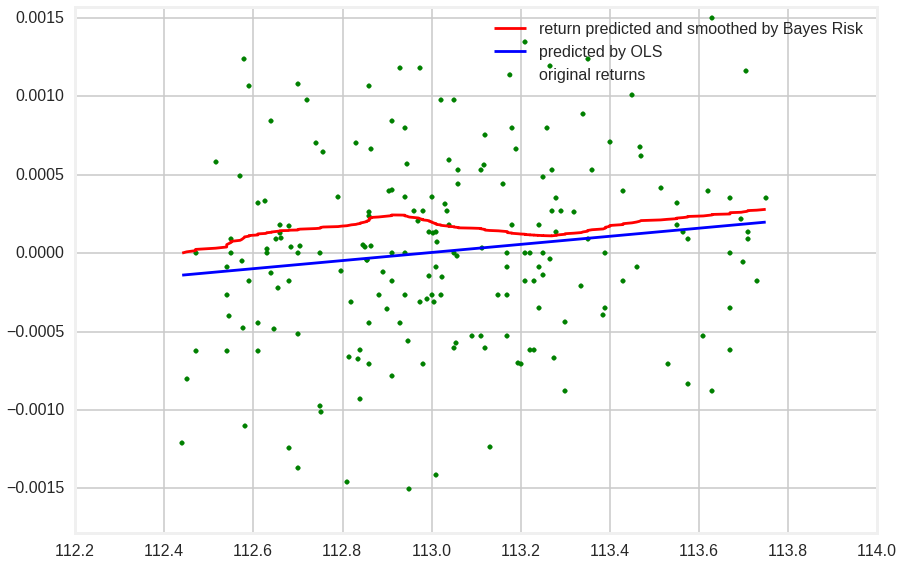

In [90]:
# x_orig (close price) and y_orig  (return) contain the first 200 ticks
x_orig,y_orig = _data['close'].values,_data['predicted_pct_change'].values

# y is the return interpolated and extrapolated using 'predicted region'
y = np.array([ extrapolate(x_orig,y_orig,x) for x in _data['close'].values])

# plot obained result
plot(_data['close'].values,   smoothed(y,80),color='r',
label='return predicted and smoothed by Bayes Risk')

scatter(_data['close'].values, 
    _data['close_pct_change'].values, color='g',
    label='original returns')
    
plot(_data['close'].values,ls_coef_ *_data['close'].values + ls_intercept,
  color='b',label='predicted by OLS'
       )
ylim(min(y_orig),max(y_orig))
legend()

It is visibly seen the difference between predictions from the OLS and Bayesian rule. 
On average, the Bayesian-rule returns tend to be large then OLS. OLS is more pessimistic or in other words, conservative.

Also, we can try to reproduce the `predicted return` using   the method proposed by Cameron Davidson-Pilon in the book "Bayesian Methods for Hackers" <a name="ref-11"/>[(CameronDavidson-Pilon, 2015)](#cite-Probabilistic_Book).

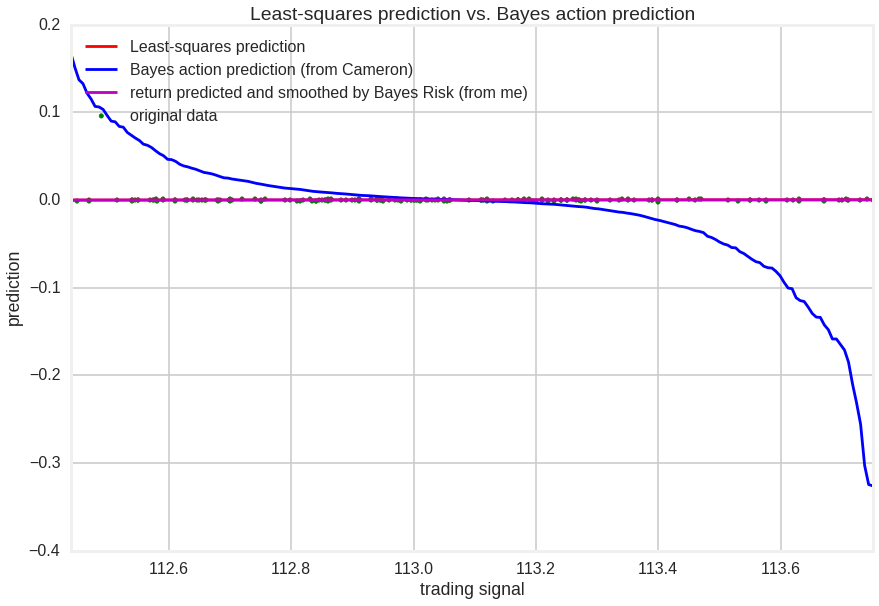

In [93]:
from scipy.optimize import fmin


def stock_loss(price, pred, coef=100):
    """vectorized for numpy"""
    sol = np.zeros_like(price)
    ix = price * pred < 0
    sol[ix] = coef * pred ** 2 - np.sign(price[ix]) * pred + abs(price[ix])
    sol[~ix] = abs(price[~ix] - pred)
    return sol


tau_samples = stocklossbayesians_decision_maker.taus
alpha_samples = stocklossbayesians_decision_maker.alphas
beta_samples =  stocklossbayesians_decision_maker.betas
X=_data['close'].values
N = tau_samples.shape[0]

noise = 1. / np.sqrt(tau_samples) * np.random.randn(N)

possible_outcomes = lambda signal: alpha_samples + beta_samples * signal \
    + noise



opt_predictions = np.zeros(200)
trading_signals = np.linspace(min(X), max(X), 200)
for i, _signal in enumerate(trading_signals):
    _possible_outcomes = possible_outcomes(_signal)
    #print _possible_outcomes.shape
    tomin = lambda pred: stock_loss(_possible_outcomes, pred).mean()
    opt_predictions[i] = fmin(tomin, 0, disp=False)


plt.xlabel("trading signal")
plt.ylabel("prediction")
plt.title("Least-squares prediction vs. Bayes action prediction")
plt.plot(X, ls_coef_ * X + ls_intercept, color='r',label="Least-squares prediction")
plt.xlim(min(X), max(X))
plt.plot(trading_signals, opt_predictions, color="b",label="Bayes action prediction (from Cameron)")
plt.scatter(X,_data['close_pct_change'].values,color='g',label='original data')
plot(_data['close'].values,   smoothed(y,80),color='m',
label='return predicted and smoothed by Bayes Risk (from me)')
plt.legend(loc="upper left");

The result from Cameron's method does not fit to observed return level well. 
The reason of that fact is not understood by me.

What happens if we increase alpha parameter of the Loss function?

Current entry 0
Current entry 20
Current entry 40
Current entry 60
Current entry 80
Current entry 100
Current entry 120
Current entry 140
Current entry 160
Current entry 180


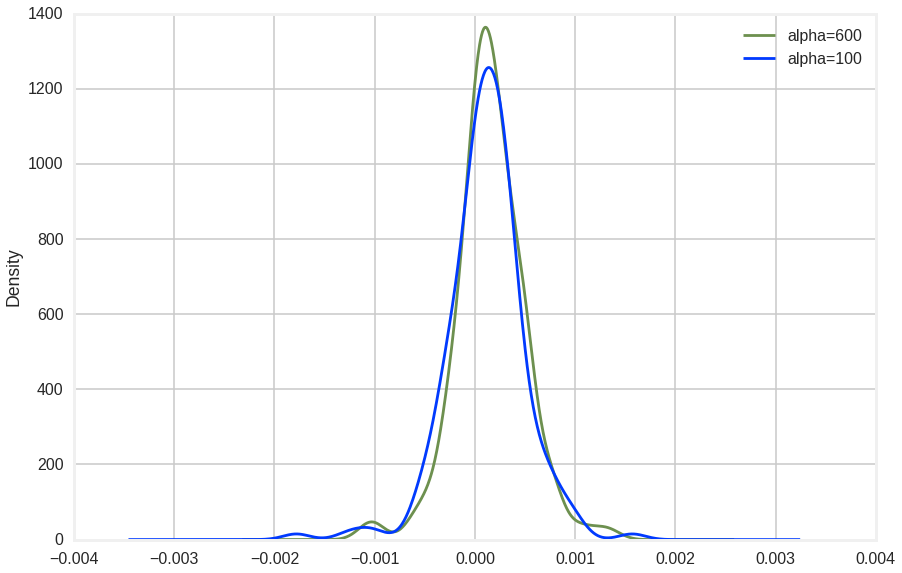

In [94]:
predicted_pct_change_600=[]
for idx in range(len(stocklossbayesians_decision_maker.data)):
    if (idx%20==0): print 'Current entry %d'%idx
    close_price=stocklossbayesians_decision_maker.data.loc[idx,'close']
    predicted_pct_change_600+=[stocklossbayesians_decision_maker.bayes_risk(close_price,600)[1]]
stocklossbayesians_decision_maker.data['predicted_pct_change_600'] = np.array(predicted_pct_change_600)
stocklossbayesians_decision_maker.data['predicted_pct_change_600'].plot(kind='kde',label='alpha=600') 
stocklossbayesians_decision_maker.data['predicted_pct_change'].plot(kind='kde',label='alpha=100')
legend()

Increasing the penalty factor $\alpha$ narrows the range of the prediction values within zero. It was expected. 

Let's make a plot superimposing all predictions and real returns.

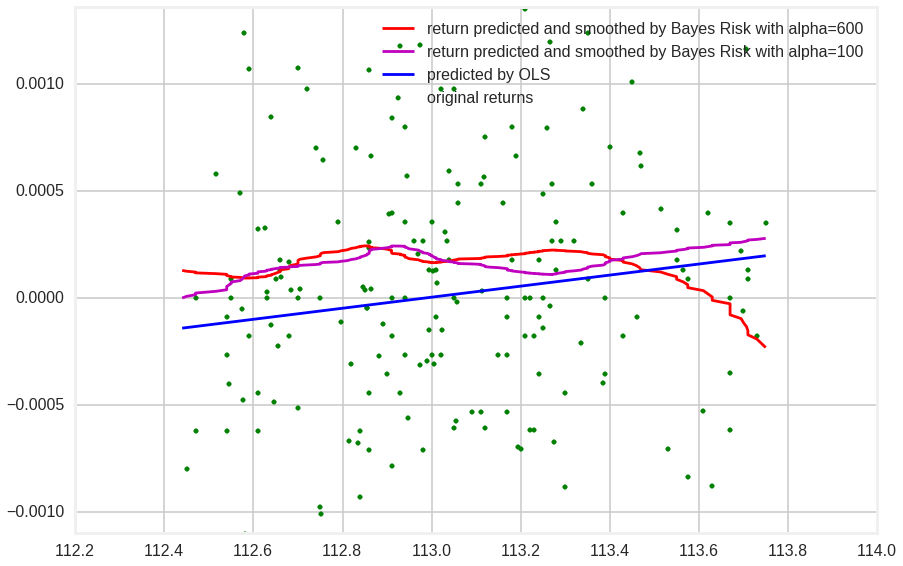

In [95]:
_data=stocklossbayesians_decision_maker.data.copy()
_data=_data.sort(columns="close")
x_orig,y_orig = _data['close'].values,_data['predicted_pct_change_600'].values
y = np.array([ extrapolate(x_orig,y_orig,x) for x in _data['close'].values])

x_orig,y_orig_2= _data['close'].values,_data['predicted_pct_change'].values
y2 = np.array([ extrapolate(x_orig,y_orig_2,x) for x in _data['close'].values])

# plot obained result

plot(_data['close'].values,   smoothed(y,80),color='r',
label='return predicted and smoothed by Bayes Risk with alpha=600')

plot(_data['close'].values,   smoothed(y2,80),color='m',
label='return predicted and smoothed by Bayes Risk with alpha=100')

scatter(_data['close'].values, 
    _data['close_pct_change'].values, color='g',
    label='original returns')
    
plot(_data['close'].values,ls_coef_ *_data['close'].values + ls_intercept,
  color='b',label='predicted by OLS'
       )
ylim(min(y_orig),max(y_orig))
legend()

We can try to predict returns for today (26.09.2015), using the Bayesian rule obtained on
the yesterday's data.

First, let's get the data.

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.google.com


total 391 recordes downloaded from Google Finance
total 270 recordes selected 


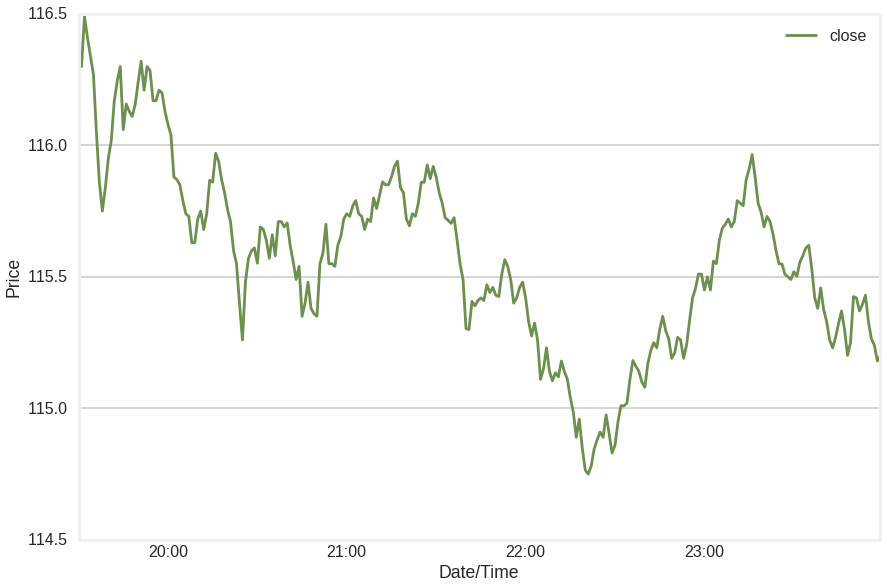

In [106]:
end_date_time = "2015-09-25 00:00:00.00"
# interval=60 -- get ticks each  minute
aapl = get_google_data('AAPL',interval=60, lookback=1, end_time=time.mktime(time.strptime(end_date_time, "%Y-%m-%d %H:%M:%S.%f")))

print "total %d recordes downloaded from Google Finance"%len(aapl)

# remove todays data
today_date_time = "2015-09-26 00:00:00.00"
today_date_time=datetime.datetime.fromtimestamp(time.mktime(time.strptime(today_date_time, "%Y-%m-%d %H:%M:%S.%f")))
aapl=aapl.loc[aapl[aapl.index<today_date_time].index,:]
aapl=aapl.reset_index()
aapl=aapl.set_index('datetime')
print "total %d recordes selected "%len(aapl)
aapl[['close']].plot(label='close price')
plt.xlabel("Date/Time")
plt.ylabel("Price")

Then,we add returns to the dataframe.

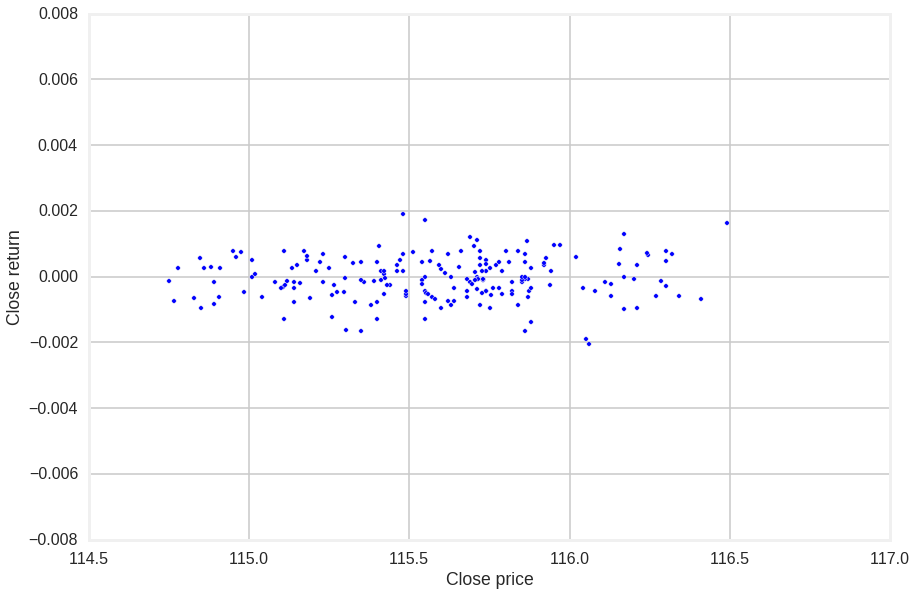

In [107]:
# copy aapl dataset to make the new dataset aapl_ols
_aapl = aapl.copy()

# prepare the data for OLS,
# on which we want to make a regression: we use first [0,200] ticks.
# The regression formula is "return ~ close +intercept"

tick_first=1
tick_last=200

# reset index 
aapl_ols=_aapl.reset_index(drop=True)

_aapl['tick_id'] = aapl_ols.index.values
# select first 100 ticks with id from ...
_aapl=_aapl.loc[_aapl[
        (_aapl['tick_id'] >= tick_first) & 
        (_aapl['tick_id'] <= tick_last)
            ].index
                     ]



# make returns and rename columns
aapl_ols=aapl_ols.pct_change()
aapl_ols.columns = [column + '_pct_change' for column in aapl_ols.columns ]
#  add tick_id
aapl_ols['tick_id'] = aapl_ols.index.values


# select first 200 ticks with id from ...
aapl_ols=aapl_ols.loc[aapl_ols[
        (aapl_ols['tick_id'] >= tick_first) & 
        (aapl_ols['tick_id'] <= tick_last)
            ].index
                     ]
# drop the tick_id_pct_change column
aapl_ols = pd.merge(aapl_ols, _aapl, on=aapl_ols.tick_id, how='outer')
aapl_ols=aapl_ols.drop('tick_id_x', 1).rename(columns = {'tick_id_y':'tick_id'})

plt.scatter(aapl_ols.close, aapl_ols.close_pct_change)
plt.xlabel("Close price")
plt.ylabel("Close return")

Then we plot predictions:

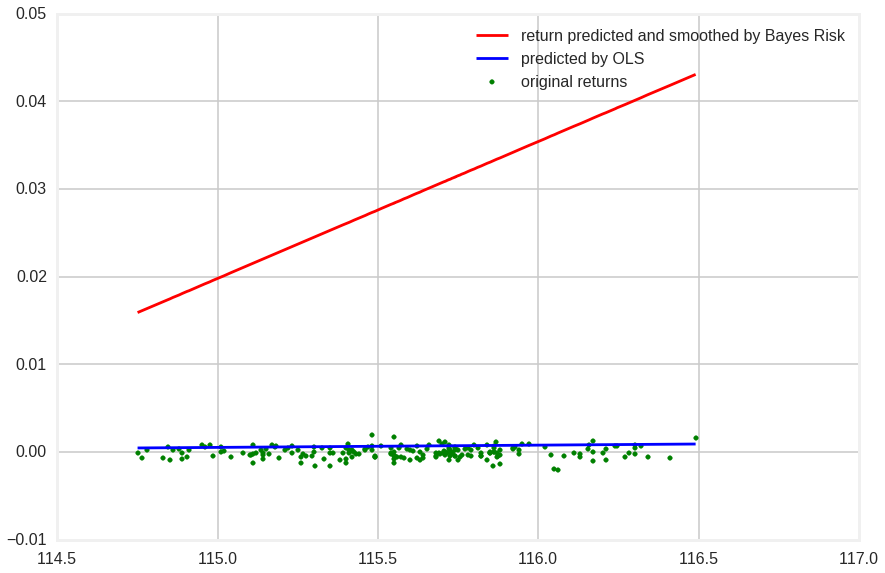

In [110]:
_aapl_ols=aapl_ols.copy()
_aapl_ols=_aapl_ols.sort(columns="close")
x_orig,y_orig = _data['close'].values,_data['predicted_pct_change'].values
y = np.array([ extrapolate(x_orig,y_orig,x) for x in _aapl_ols['close'].values])
# plot obained result

plot(_aapl_ols['close'].values,   smoothed(y,1),color='r',
label='return predicted and smoothed by Bayes Risk')

scatter(_aapl_ols['close'].values, 
    _aapl_ols['close_pct_change'].values, color='g',
    label='original returns')
    
plot(_aapl_ols['close'].values,ls_coef_ *_aapl_ols['close'].values + ls_intercept,
  color='b',label='predicted by OLS'
       )
#ylim(min(y_orig)*1.2,max(y_orig)*1.2)
legend()

   Definitely, the 'yesterday' model couldn't predict return today, because of the gap in the close prices (see yesterday plots of the AAPL timeseries)

$$\\[10pt]$$

### 0.6.5 An example of the Astrophysics: Observing Dark World

-------------------------------------

Recently,in 2012, the Kaggle contest was about *Observing Dark World* <a name="ref-12"/>[(Kaggle, 2012)](#cite-Kaggle).


>There is more to the Universe than meets the eye. Out in the cosmos exists a form of matter that outnumbers the stuff we can see by almost 7 to 1, and we don't know what it is. What we do know is that it does not emit or absorb light, so we call it Dark Matter.

>Such a vast amount of aggregated matter does not go unnoticed. In fact we observe that this stuff aggregates and forms massive structures called Dark Matter Halos.

>Although dark, it warps and bends spacetime such that any light from a background galaxy which passes close to the Dark Matter will have its path altered and changed. This bending causes the galaxy to appear as an ellipse in the sky. 

<center><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3084/media/heic0814f.jpg" width=800px></center>

>Since there are many galaxies behind a Dark Matter halo, their shapes will correlate with its position.

<center><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3084/media/reorderdarkmatter.png" width=800px></center>

>**What’s The Problem?**

>**Detecting these Dark Matter halos is hard, but possible using this data. If we can accurately estimate the positions of these halos, we can then understand the function they play in the Universe. There are various methods to attack the problem (we have given you some examples), however we have not been able to reach the level of precision required to understand exactly where this Dark Matter is for all Dark Matter halos.**

>**We challenge YOU to detect the most elusive, mysterious and yet most abundant matter in all existence.**

$$\\[10pt]$$
### The Data

---------------------------



The dataset is actually **300 separate files, each representing a sky**. 

In each file, or sky, there are between 300 and 720 galaxies. Each galaxy has an $x$ and $y$ position associated with it, ranging from 0 to 4200, and measures of ellipticity: $e_1$ and $e_2$. Information about what these measures mean can be found here [cite](#cite-Kaggle_ellipticity,) but for our purposes it does not matter besides for visualization purposes. Thus a typical sky might look like the following.



Data on galaxies in sky 3.
position_x, position_y, e_1, e_2 


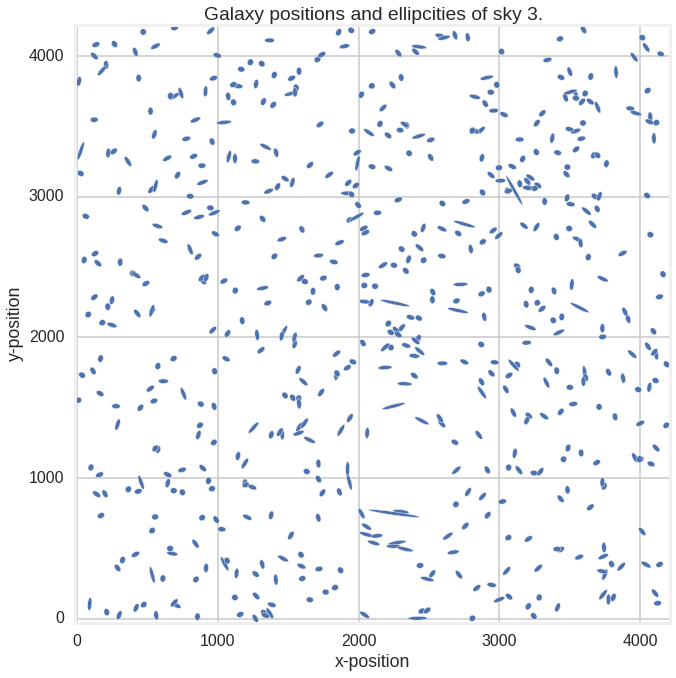

In [111]:
from draw_sky2 import draw_sky
sns.set_context("poster")
plt.figure(figsize=(15,8))
n_sky = 3  # choose a file/sky to examine.
data = np.genfromtxt("data/Train_Skies/Train_Skies/\
Training_Sky%d.csv" % (n_sky),
                      dtype=None,
                      skip_header=1,
                      delimiter=",",
                      usecols=[1, 2, 3, 4])
print "Data on galaxies in sky %d." % n_sky
print "position_x, position_y, e_1, e_2 "

fig = draw_sky(data)
plt.title("Galaxy positions and ellipcities of sky %d." % n_sky)
plt.xlabel("x-position")
plt.ylabel("y-position");

$$\\[10pt]$$
### The Model of the Dark Matter

------------------------------


Each sky has one, two or three dark matter halos in it.
I will follow details of the winning solution in the copmetetion proposed by Tim Salimans.
Tim's solution details that his prior distribution of halo positions was uniform, i.e.

\begin{align}
& x_i \sim \text{Uniform}( 0, 4200)\\\\
& y_i \sim \text{Uniform}( 0, 4200), \;\; i=1,2,3\\\\
\end{align}

Tim and other competitors noted that most skies had one large halo and other halos, if present, were much smaller. Larger halos, having more mass, will influence the surrounding galaxies more. He decided that the large halos would have a mass distributed as a *log*-uniform random variable between 40 and 180 i.e.

$$  m_{\text{large} } = \log \text{Uniform}( 40, 180 ) $$

and in PyMC, 

    exp_mass_large = pm.Uniform("exp_mass_large", 40, 180)
    @pm.deterministic
    def mass_large(u = exp_mass_large):
       return np.log(u)

(This is what we mean when we say *log*-uniform.) For smaller galaxies, Tim set the mass to be the logarithm of 20. Why did Tim not create a prior for the smaller mass, nor treat it as a unknown? I believe this decision was made to speed up convergence of the algorithm. This is not too restrictive, as by construction the smaller halos have less influence on the galaxies.

Tim logically assumed that the ellipticity of each galaxy is dependent on the position of the halos, the distance between the galaxy and halo, and the mass of the halos. Thus the vector of ellipticity of each galaxy, $\mathbf{e}_i$, are *children* variables of the vector of halo positions $(\mathbf{x},\mathbf{y})$, distance (which we will formalize), and halo masses.

Tim conceived a relationship to connect positions and ellipticity by reading literature and forum posts. He supposed the following was a reasonable relationship:

$$ e_i | ( \mathbf{x}, \mathbf{y} ) \sim \text{Normal}( \sum_{j = \text{halo positions} }d_{i,j} m_j f( r_{i,j} ), \sigma^2 ) $$

where $d_{i,j}$ is the *tangential direction* (the direction in which halo $j$ bends the light of galaxy $i$), $m_j$ is the mass of halo $j$, $f(r_{i,j})$ is a *decreasing function* of the Euclidean distance between halo $j$ and galaxy $i$. 

Tim's function $f$ was defined:

$$ f( r_{i,j} ) = \frac{1}{\min( r_{i,j}, 240 ) } $$

for large halos, and for small halos

$$ f( r_{i,j} ) = \frac{1}{\min( r_{i,j}, 70 ) } $$

This fully bridges our observations and unknown. This model is incredibly simple, and Tim mentions this simplicity was purposefully designed: it prevents the model from overfitting.  


### Training & PyMC implementation

For each sky, we run our Bayesian model to find the posteriors for the halo positions &mdash; we ignore the (known) halo position. This is slightly different than perhaps traditional approaches to Kaggle competitions, where this model uses no data from other skies nor the known halo location. That does not mean other data are not necessary &mdash; in fact, the model was created by comparing different skies. 


In [112]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A Model for the Dark Matter Study
'''


#defines the class for the Modeling
class ModelDarkMatter(BaseModel):
    """ A ModelDarkMatter class 
         :param np.ndarray data: The  data to use for learning the model.         
    """


    def __init__(self, data):        
    
        logging.info('building the  model....') 
        super(ModelDarkMatter,self).__init__( data )        

        # a priory 
        self.exp_mass_large = pm.Uniform("exp_mass_large", 40, 180)

        # set the initial prior position of the halos, it's a 2-d Uniform dist.
        self.halo_position = pm.Uniform("halo_position", 0, 4200, size=(2,))
         
        
        # LogUniform prior on the mass of halos
        @pm.deterministic
        def mass_large(u = self.exp_mass_large):
            return np.log(u)
        
        def euclidean_distance(x, y):
            return np.sqrt(((x - y) ** 2).sum(axis=1))


        # this function plays the role of the loss function
        def f_distance(gxy_pos, halo_pos, c):
            # halo_pos should be a 2-d numpy array
            return np.maximum(euclidean_distance(gxy_pos, halo_pos), c)[:, None]
        
        
        def tangential_distance(glxy_position, halo_position):
            # foo_position should be a 2-d numpy array
            delta = glxy_position - halo_position
            t = (2 * np.arctan(delta[:, 1] / delta[:, 0]))[:, None] # [:,None] is needed
            # for this  np.concatenate. Here we use axis=1 to make an array of tuples 
            # (-np.cos(t), -np.sin(t))
            return np.concatenate([-np.cos(t), -np.sin(t)], axis=1)
        
        @pm.deterministic
        # data[:, :2] -> data[:](0,1) -> x and y positions of the galaxies
        def mean(mass=mass_large, h_pos=self.halo_position, glx_pos=data[:, :2]):
            return mass / f_distance(glx_pos, h_pos, 240) *\
            tangential_distance(glx_pos, h_pos)
        
        
        # Here  we add the observed value: ellipcity
        self.ellipcity = pm.Normal("ellipcity", mean, 1. / 0.005, observed=True,
                   value=data[:, 2:])

    
        # our model collects all definitions in self.model        
        self.model = pm.MCMC([
             self.exp_mass_large,mean, self.halo_position, mass_large,self.ellipcity
            ])
        self.map = pm.MAP([self.exp_mass_large,mean, self.halo_position, mass_large,self.ellipcity])
        self.map.fit()
        logging.info('done building the  model')


        
def _prepare_trace(self):
    ''' prepare a dataframe with traces of the parameters of 
        our model
    '''
    self.traces = {'exp_mass_large': self.exp_mass_large.trace(), 
                  'halo_position': self.halo_position.trace()                                             
                   }
    return  self.traces



# Update the interface of our model
ModelDarkMatter.prepare_trace = _prepare_trace
        

darkmatter_model= ModelDarkMatter(data)
darkmatter_model.model.sample(200000, 140000, 3)


INFO:root:building the  model....
INFO:root:done building the  model


 [-----------------100%-----------------] 200000 of 200000 complete in 128.1 sec

After the model has been built, we can introduce the machinary to make decisions.
We are going to use the Bayes risk again to chose the most optimal prediction of the halo
position. First, we define the basic functionality of the `DecisionDarkMatterBayesians`, namely the loss function.

In [113]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

# Define the DecisionMaker for Bayesians utilizing the Bayes rule
class DecisionDarkMatterBayesians(BaseDecision):
    """ DecisionDarkMatterBayesians Class"""

    def __init__(self, prior_data,model=None):    
         
        logging.info('building the DecisionLossBayesians....') 
        super(DecisionDarkMatterBayesians,self).__init__( prior_data )      
        self.model = model
        self.traces=None
        logging.info('building the DecisionLossBayesians....done') 
        
    
    def __str__(self):
        return  "%s say: ...."%(self.__class__.__name__)
    
    
    def loss(self,theta_true,theta_guess):
         '''  the squared-error loss function '''
            
        # put some 'printings' of the debug information
        # for testing purpose
        
        # print "theta_true=",theta_true
        # print "theta_guess=",theta_guess
        # print "a=", (theta_true-theta_guess)**2
        # print "a=", ((theta_true-theta_guess)**2).sum()
         return ((theta_true-theta_guess)**2).sum()
        # return ((theta_true-theta_guess)**2).sum(axis=1)

darkmatterbayesians_decision_maker = DecisionDarkMatterBayesians(data,darkmatter_model)

INFO:root:building the DecisionLossBayesians....
INFO:root:building the DecisionLossBayesians....done


In [114]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Decision Makers.
'''

def _posterior_risk(self,rule):
    ''' here rule is a guess of the price of the prize suite '''
    
    if (self.traces is None):    self.traces = self.model.prepare_trace()
    self.hallo_positions = self.traces['halo_position']
        
    func= lambda x: self.loss(x,rule)
    return np.array([func(x) for x in self.hallo_positions ])
    

def _bayes_loss(self,rule):
    ''' returns the bayes loss'''
    return np.mean(self.posterior_risk(rule))


def _bayes_risk(self):
    ''' returns the bayes risk and bayes rule '''
    
    import scipy.optimize as sop

    bayes_rule,bayes_loss,_,_,_=sop.fmin(self.bayes_loss, np.array([0.,0.]),full_output=True, disp=False)
    return  bayes_loss,bayes_rule



# Update the definition of the DecisionLossBayesians
DecisionDarkMatterBayesians.posterior_risk = _posterior_risk
DecisionDarkMatterBayesians.bayes_loss = _bayes_loss
DecisionDarkMatterBayesians.bayes_risk = _bayes_risk

print darkmatterbayesians_decision_maker.bayes_loss(np.array([0.,0.]))
bayes_halo_poistion = darkmatterbayesians_decision_maker.bayes_risk()
print bayes_halo_poistion

6796131.95899
(8683.4289535070984, array([ 2329.17118849,  1167.22325052]))


Now, if we do the ad-hoc test, just averaging posterior halo positions, we obtain the same
result, as `DecisionDarkMatterBayesians` returns. This happens because we have included
the function $$ f( r_{i,j} ) = \frac{1}{\min( r_{i,j}, 240 ) } $$ in our Likelihood.

In [115]:
# a sanity test, showing that the Bayes Risk Management should gives us these values!
print darkmatter_model.prepare_trace()['halo_position'].mean(axis=0)

[ 2329.17117338  1167.22327562]


Below we plot a "heatmap" of the posterior distribution (which is just a scatter plot of the posterior, but we can visualize it as a heatmap).

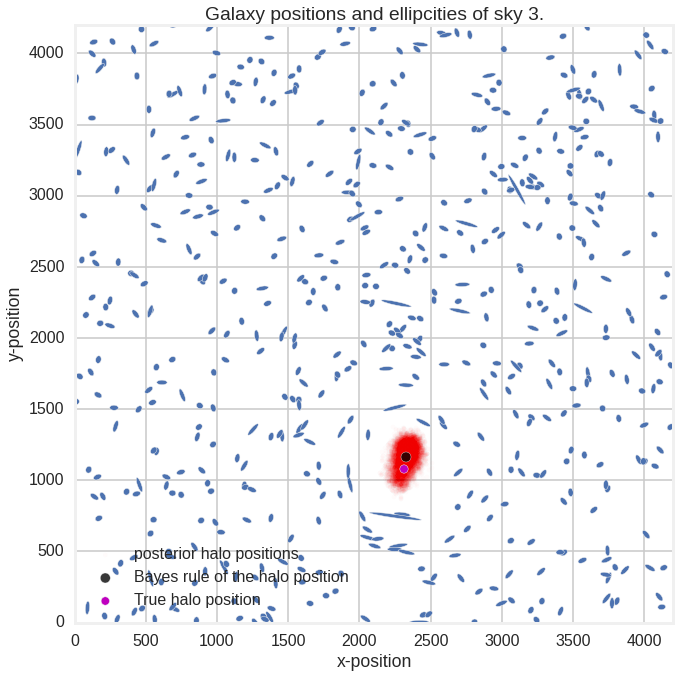

In [116]:
fig = draw_sky(data)
plt.title("Galaxy positions and ellipcities of sky %d." % n_sky)
plt.xlabel("x-position")
plt.ylabel("y-position")

# a "heatmap" of the posterior halo positions
plt.scatter(darkmatterbayesians_decision_maker.hallo_positions[:, 0], 
            darkmatterbayesians_decision_maker.hallo_positions[:, 1], alpha=0.015, c="r",
           label="posterior halo positions"
           )

#a positions of the posterior halo given by Bayes rule
plt.scatter(bayes_halo_poistion[1][0], 
            bayes_halo_poistion[1][1], alpha=0.78, c="k", s=100,
           label="Bayes rule of the halo position")

# Let's get true positions of the halo
halo_data = np.genfromtxt("data/Training_halos.csv",
                          delimiter=",",
                          usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9],
                          skip_header=1)

plt.scatter(halo_data[n_sky - 1][3], halo_data[n_sky - 1][4],
            label="True halo position",
            c="m", s=70)
plt.legend(scatterpoints=1, loc="lower left")
plt.xlim(0, 4200)
plt.ylim(0, 4200);

Our next step is to use the the score function from organizers to understand how small our
score (as smaller as better).

In [117]:
from DarkWorldsMetric import main_score

_halo_data = halo_data[n_sky - 1]

nhalo_all = _halo_data[0].reshape(1, 1)
x_true_all = _halo_data[3].reshape(1, 1)
y_true_all = _halo_data[4].reshape(1, 1)
x_ref_all = _halo_data[1].reshape(1, 1)
y_ref_all = _halo_data[2].reshape(1, 1)


# Our result
print "Using the Bayes risk:"
main_score(nhalo_all, x_true_all, y_true_all,
           x_ref_all, y_ref_all, bayes_halo_poistion[1].reshape(1,2))


# The 'random' result
random_guess = np.random.randint(0, 4200, size=(1, 2))
print "Using a random location:", random_guess
main_score(nhalo_all, x_true_all, y_true_all,
           x_ref_all, y_ref_all, random_guess)


Using the Bayes risk:
Your average distance in pixels you are away from the true halo is 86.3183131368
Your average angular vector is 1.0
Your score for the training data is 1.08631831314
Using a random location: [[ 753 3691]]
Your average distance in pixels you are away from the true halo is 3041.28644342
Your average angular vector is 1.0
Your score for the training data is 4.04128644342


4.0412864434150233

There are only 86 pixels away from the true halo positions, not bad! This is a good guess, it is not very far from the true location.  We can also extend our code to allow for up to two additional, *smaller* halos: Let's add a new prior function to the model caring information about small halos. We add two small masses.

In [118]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    A Model for the Dark Matter Study
'''


#defines the class for the Modeling
class ModelDarkMatterExtended(BaseModel):
    """ A ModelDarkMatterExtended class 
         :param np.ndarray data: The  data to use for learning the model.         
    """


    def __init__(self, data):        
    
        logging.info('building the  model....') 
        super(ModelDarkMatterExtended,self).__init__( data )        

        # a priory 
        self.exp_mass_large = pm.Uniform("exp_mass_large", 40, 180)
        self.exp_mass_small = pm.Uniform("exp_mass_small", 10, 20) # new priory
        self.exp_mass_medium = pm.Uniform("exp_mass_medium", 20, 40) # new priory

        # set the initial prior position of the halos, it's a 2-d Uniform dist.
        # we consider 3 halos with 3 masses
        self.halo_position = pm.Uniform("halo_position", 0, 4200, size=(3,2))
         
        
        # LogUniform prior on the mass of halos
        @pm.deterministic
        def mass_large(u = self.exp_mass_large):
            return np.log(u)
        
        # LogUniform prior on the mass of halos
        @pm.deterministic
        def mass_small(u = self.exp_mass_small):
            return np.log(u)
        
        # LogUniform prior on the mass of halos
        @pm.deterministic
        def mass_medium(u = self.exp_mass_medium):
            return np.log(u)
        
        def euclidean_distance(x, y):
            return np.sqrt(((x - y) ** 2).sum(axis=1))


        self.fdist_constants = np.array([240, 70, 50])
        self.masses =  np.array([mass_large,mass_medium,mass_small], dtype=object)
        
        # this function plays the role of the loss function
        def f_distance(gxy_pos, halo_pos, c):
            # halo_pos should be a 2-d numpy array
            return np.maximum(euclidean_distance(gxy_pos, halo_pos), c)[:, None]
        
        
        def tangential_distance(glxy_position, halo_position):
            # foo_position should be a 2-d numpy array
            delta = glxy_position - halo_position
            t = (2 * np.arctan(delta[:, 1] / delta[:, 0]))[:, None] # [:,None] is needed
            # for this  np.concatenate. Here we use axis=1 to make an array of tuples (-np.cos(t), -np.sin(t))
            return np.concatenate([-np.cos(t), -np.sin(t)], axis=1)
        
        @pm.deterministic
        # data[:, :2] -> data[:](0,1) -> x and y positions of the galaxies
        def mean(masses=self.masses, h_pos=self.halo_position, glx_pos=data[:, :2]):
            means= [masses[i] / f_distance(glx_pos, h_pos[i,:],self.fdist_constants[i])*\
            tangential_distance(glx_pos, h_pos[i,:]) for i in range(3)]
            return sum(means)
        
        
        # Here  we add the observed value: ellipcity
        self.ellipcity = pm.Normal("ellipcity", mean, 1. / 0.005, observed=True,
                   value=data[:, 2:])

    
        # our model collects all definitions in self.model        
        self.model = pm.MCMC([
             self.exp_mass_large,self.exp_mass_small, self.exp_mass_medium,mean, self.halo_position, mass_large,mass_medium,mass_small,self.ellipcity
            ])
        self.map = pm.MAP([self.exp_mass_large,self.exp_mass_small, self.exp_mass_medium,mean, self.halo_position, mass_large,mass_medium,mass_small,self.ellipcity])
        self.map.fit()
        logging.info('done building the  model')


        
def _prepare_trace(self):
    ''' prepare a dataframe with traces of the parameters of 
        our model
    '''
    self.traces = {
                   'exp_mass_large': self.exp_mass_large.trace(), 
                   'exp_mass_small':self.exp_mass_small.trace(), 
                   'exp_mass_medium':self.exp_mass_medium.trace(), 
                   'halo_position': self.halo_position.trace()                                             
                   }
    return  self.traces



# Update the interface of our model
ModelDarkMatterExtended.prepare_trace = _prepare_trace
        

darkmatter_extendedmodel= ModelDarkMatterExtended(data)
darkmatter_extendedmodel.model.sample(200000, 140000, 3)


INFO:root:building the  model....
INFO:root:done building the  model


 [-----------------100%-----------------] 200000 of 200000 complete in 615.1 sec

In [119]:
darkmatterbayesians_decision_maker = DecisionDarkMatterBayesians(data,darkmatter_extendedmodel)
print darkmatterbayesians_decision_maker.bayes_loss(np.array([0.,0.]))
bayes_halo_poistion = darkmatterbayesians_decision_maker.bayes_risk()
print bayes_halo_poistion


INFO:root:building the DecisionLossBayesians....
INFO:root:building the DecisionLossBayesians....done


51280068.7381
(4249968.502866541, array([ 1806.91417868,  3523.03297678]))


In [120]:
print "Using the Bayes risk:"
main_score(nhalo_all, x_true_all, y_true_all,
           x_ref_all, y_ref_all, bayes_halo_poistion[1].reshape(1,2))

Using the Bayes risk:
Your average distance in pixels you are away from the true halo is 2493.55780435
Your average angular vector is 1.0
Your score for the training data is 3.49355780435


3.4935578043485913

We have got the worse result for the sky number 3, because this sky contains only one halo.
On practice, we can introduce the factors, uniform distributed,in [0,1] range which would be fractions of mass contributions from large, medium and small hallos.  The plot of the sky #3
and hallos supports my words.

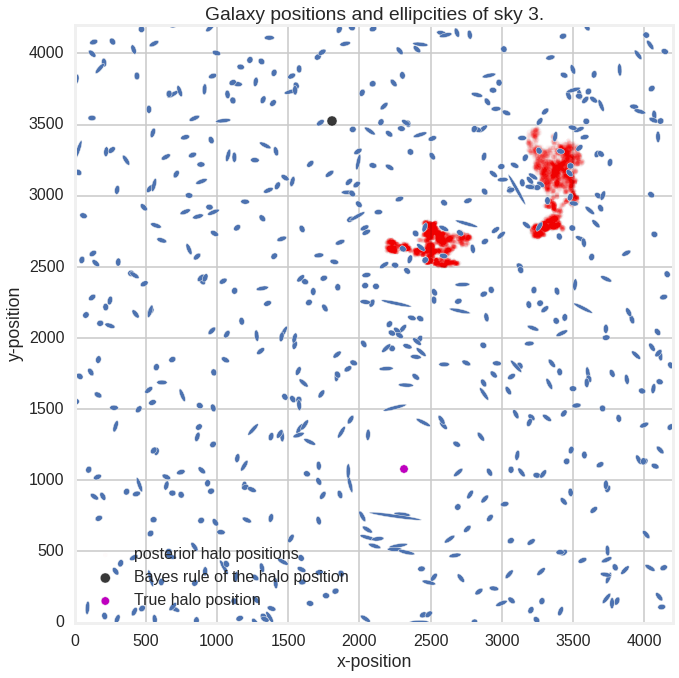

In [121]:
fig = draw_sky(data)
plt.title("Galaxy positions and ellipcities of sky %d." % n_sky)
plt.xlabel("x-position")
plt.ylabel("y-position")

# a "heatmap" of the posterior halo positions
plt.scatter(darkmatterbayesians_decision_maker.hallo_positions[:, 0], 
            darkmatterbayesians_decision_maker.hallo_positions[:, 1], alpha=0.015, c="r",
           label="posterior halo positions"
           )

#a positions of the posterior halo given by Bayes rule
plt.scatter(bayes_halo_poistion[1][0], 
            bayes_halo_poistion[1][1], alpha=0.78, c="k", s=100,
           label="Bayes rule of the halo position")

# Let's get true positions of the halo
halo_data = np.genfromtxt("data/Training_halos.csv",
                          delimiter=",",
                          usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9],
                          skip_header=1)

plt.scatter(halo_data[n_sky - 1][3], halo_data[n_sky - 1][4],
            label="True halo position",
            c="m", s=70)
plt.legend(scatterpoints=1, loc="lower left")
plt.xlim(0, 4200)
plt.ylim(0, 4200);

Small and Medium hallos distort and reduce the influence of the large hallo, thus it is  making predictions more vulnerable.



### **That's it for this lecture. I hope that this lecture/tutorial came out good.**

In [ ]:
### Do not delete the following Markdown section! 
### This is the BibTeX references!

<!--bibtex


@Article{WARNER,
  Author    = {D. WARNER NORTH,},
  Title     = {A Tutorial Introduction to Decision Theory}, 
  year      = 1968,
  url       = "https://drive.google.com/file/d/0B5OwgVT-YmdbVDdYVFk2LXlxVWc/view?usp=sharing",  
}

@Article{Risk_aversion,
  Author    = {Wikimedia Foundation, Inc},
  Title     = {Risk aversion}, 
  year      = 2015,
  url       = "https://en.wikipedia.org/wiki/Risk_aversion",  
}

@Article{James_DT,
  Author    = {James F.,},
  Title     = {Decision Theory},
  year      = 2012,
  url       = "https://www.luminpdf.com/viewer/SJqiwgnfkYz9gqQHP?sk=336a7cb6-5f20-421a-9ff2-6540eea71c7e",  
}


@Article{Jordan_DT,
  Author    = {Jordan I.M.,},
  Title     = {Lecture3: Decision theory},
  year      = 2014,
  url       = "http://www.cs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture3.pdf",  
}

@Article{Price_List,
  Author    = {www.datagrabber.org,},
  Title     = {Facebook Price Is Right SHOWCASE (Retail Prices)},
  year      = 2015,
  url       = "http://www.datagrabber.org/welcome-to-datagrabber-org/price-is-right-showcase-cheat-prices/?doing_wp_cron=1439468477.1399750709533691406250",  
}

@Article{Google_marketlist,
  Author    = {Google Finance,},
  Title     = {Finance Data Listing and Disclaimers},
  year      = 2015,
  url       = "http://www.google.com/intl/en/googlefinance/disclaimer/",  
}

@Article{MaximillianVitek,
  Author    = {Maximillian Vitek,},
  Title     = {A python module for getting intraday data from Google Finance},
  year      = 2014,
  url       = "https://github.com/maxvitek/intradata",  
}

@Article{Probabilistic_Book,
  Author    = {Cameron Davidson-Pilon,},
  Title     = {Bayesian Methods for Hackers: Chapter5},
  year      = 2015,
  url       = "http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter5_LossFunctions/Chapter5.ipynb",  
}

@Article{Kaggle,
  Author    = {Kaggle,},
  Title     = {Can you find the Dark Matter that dominates our Universe?},
  year      = 2012,
  url       = "https://www.kaggle.com/c/DarkWorlds",  
}

@Article{Kaggle_ellipticity,
  Author    = {Kaggle,},
  Title     = {An introduction to the ellipticity},
  year      = 2012,
  url       = "https://www.kaggle.com/c/DarkWorlds/details/an-introduction-to-ellipticity",  
}

-->

#References

<a name="cite-WARNER"/><sup>[^](#ref-1) [^](#ref-2) [^](#ref-3) </sup>D. WARNER NORTH,. 1968. _A Tutorial Introduction to Decision Theory_. [URL](https://drive.google.com/file/d/0B5OwgVT-YmdbVDdYVFk2LXlxVWc/view?usp=sharing)

<a name="cite-Risk_aversion"/><sup>[^](#ref-4) </sup>Wikimedia Foundation, Inc. 2015. _Risk aversion_. [URL](https://en.wikipedia.org/wiki/Risk_aversion)

<a name="cite-James_DT"/><sup>[^](#ref-5) </sup>James F.,. 2012. _Decision Theory_. [URL](https://www.luminpdf.com/viewer/SJqiwgnfkYz9gqQHP?sk=336a7cb6-5f20-421a-9ff2-6540eea71c7e)

<a name="cite-Jordan_DT"/><sup>[^](#ref-6) </sup>Jordan I.M.,. 2014. _Lecture3: Decision theory_. [URL](http://www.cs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture3.pdf)

<a name="cite-Price_List"/><sup>[^](#ref-7) [^](#ref-8) </sup>www.datagrabber.org,. 2015. _Facebook Price Is Right SHOWCASE (Retail Prices)_. [URL](http://www.datagrabber.org/welcome-to-datagrabber-org/price-is-right-showcase-cheat-prices/?doing_wp_cron=1439468477.1399750709533691406250)

<a name="cite-Google_marketlist"/><sup>[^](#ref-9) </sup>Google Finance,. 2015. _Finance Data Listing and Disclaimers_. [URL](http://www.google.com/intl/en/googlefinance/disclaimer/)

<a name="cite-MaximillianVitek"/><sup>[^](#ref-10) </sup>Maximillian Vitek,. 2014. _A python module for getting intraday data from Google Finance_. [URL](https://github.com/maxvitek/intradata)

<a name="cite-Probabilistic_Book"/><sup>[^](#ref-11) </sup>Cameron Davidson-Pilon,. 2015. _Bayesian Methods for Hackers: Chapter5_. [URL](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter5_LossFunctions/Chapter5.ipynb)

<a name="cite-Kaggle"/><sup>[^](#ref-12) </sup>Kaggle,. 2012. _Can you find the Dark Matter that dominates our Universe?_. [URL](https://www.kaggle.com/c/DarkWorlds)

